<span style="font-size:24px;">**Latar Belakang**</span>

Sebuah perusahaan yang berfokus pada pengembangan dan penyediaan software penjualan dan marketing untuk klien B2B, dengan keahlian dalam menciptakan solusi yang mengoptimalkan strategi penjualan dan pemasaran, perusahaan berkomitmen untuk meningkatkan potensi penjualan klien mereka. Untuk mencapai tujuan ini, perusahaan ingin menyelaraskan produk mereka lebih erat dengan relevansi bidang bisnis setiap customer, guna menawarkan solusi yang lebih tepat guna dan efektif. Pendekatan ini bertujuan untuk memberikan dampak maksimal pada setiap lini produk dan mendongkrak hasil penjualan secara keseluruhan.

<span style="font-size:24px;">**Perumusan Masalah**</span>

Perusahaan menghadapi tantangan dalam menentukan faktor-faktor yang menyebabkan produk-produk mereka  merugi. Tanpa pemahaman yang jelas tentang penyebab kerugian ini, perusahaan kesulitan mengidentifikasi produk-produk dengan performa finansial rendah dan merumuskan strategi yang efektif untuk memperbaikinya. Akibatnya, perusahaan belum dapat mengoptimalkan profitabilitasnya secara keseluruhan. Oleh karena itu, perlu dilakukan analisis mendalam untuk mengidentifikasi kriteria yang menyebabkan profit negatif pada produk-produk tertentu dan mengembangkan strategi perbaikan yang optimal untuk memaksimalkan potensi profitabilitas perusahaan di masa depan.

<span style="font-size:24px;">**Data**</span>

Untuk menjawab tantangan diatas kita menganalisa data yang telah dikumpulkan sebelumnya. Saya akan menampilkan **10 sampel acak dari data** dan **informasi dari setiap kolom, seperti datatype**.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, kendalltau
import itertools
import numpy as np

df = pd.read_csv("SaaS-Sales.csv")
display(df.sample(10), df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
7410,7411,EMEA-2020-103058,7/23/2020,20200723,Carol Campbell,United Kingdom,London,EMEA,UKIR,Home Depot,1047,Retail,SMB,Data Smasher,B0OQQSGXRW,99.980,2,0.0,7.9984
8896,8897,AMER-2022-167241,8/16/2022,20220816,Zoe Ferguson,United States,New York City,AMER,NAMER,Cigna,1038,Healthcare,SMB,Site Analytics,QK5KGBQ325,165.600,3,0.2,10.3500
4207,4208,EMEA-2020-145387,10/31/2020,20201031,Joanne Blake,Norway,Oslo,EMEA,NOR,PepsiCo,1073,Consumer Products,SMB,SaaS Connector Pack,JF93K1KGHZ,17.670,3,0.0,7.7748
2506,2507,AMER-2020-143917,7/25/2020,20200725,Trevor Langdon,United States,Los Angeles,AMER,NAMER,Target,1085,Retail,SMB,SaaS Connector Pack,X4PL51Q2PB,77.920,8,0.0,34.2848
1737,1738,AMER-2021-130204,9/3/2021,20210903,William Skinner,United States,Los Angeles,AMER,NAMER,Merck,1064,Healthcare,Strategic,Marketing Suite - Gold,DX0ZV44G9H,31.440,3,0.0,8.4888
816,817,EMEA-2022-149370,9/16/2022,20220916,Karen Taylor,France,Paris,EMEA,EU-WEST,Coca-Cola,1021,Consumer Products,SMB,Support,6JCYU6BV5V,5.344,1,0.2,1.8704
6410,6411,APJ-2023-161774,5/15/2023,20230515,Michelle Langdon,Japan,Tokyo,APJ,JAPN,Lukoil,1044,Energy,SMB,Site Analytics,CJC1RBH8ZP,7.992,1,0.2,0.6993
3124,3125,EMEA-2021-121720,6/11/2021,20210611,Bernadette Scott,Germany,Frankfurt,EMEA,EU-WEST,American Express,1005,Finance,Strategic,Marketing Suite - Gold,NL4WLYIYWC,1036.624,2,0.2,51.8312
7367,7368,EMEA-2022-127243,11/29/2022,20221129,Joe Ross,France,Paris,EMEA,EU-WEST,Wells Fargo,1099,Finance,Strategic,FinanceHub,X13IOY2XPC,347.802,7,0.3,-24.8430
2006,2007,EMEA-2020-111150,12/31/2020,20201231,Connor McDonald,Poland,Warsaw,EMEA,EU-WEST,Chevron,1017,Energy,Strategic,Data Smasher,MW9SZXAMYI,47.530,7,0.0,16.1602


None

**Berikut Data Dictionarynya :**
1. Row ID: Identifikasi unik untuk setiap transaksi.
2. Order ID: Identifikasi unik untuk setiap pesanan.
3. Order Date: Tanggal saat pesanan ditempatkan.
4. Date Key: Representasi numerik dari tanggal pesanan (YYYYMMDD).
5. Contact Name: Nama orang yang melakukan pesanan.
6. Country: Negara tempat pesanan dilakukan.
7. City: Kota tempat pesanan dilakukan.
8. Region: Wilayah tempat pesanan dilakukan.
9. Subregion: Subwilayah tempat pesanan dilakukan.
10. Customer: Nama perusahaan yang melakukan pesanan.
11. Customer ID: Identifikasi unik untuk setiap pelanggan.
12. Industry: Industri yang dimiliki pelanggan.
13. Segment: Segmen pelanggan (SMB, Strategis, Enterprise, dll.).
14. Product: Produk yang dipesan.
15. License: Kunci lisensi untuk produk.
16. Sales: Jumlah total penjualan untuk transaksi.
17. Quantity: Jumlah total barang dalam transaksi.
18. Discount: Diskon yang diterapkan pada transaksi.
19. Profit: Keuntungan dari transaksi.

<span style="font-size:24px;">**Data Cleaning**</span>

Kita akan membersihkan data dari duplikat dan data kosong/ tidak lengkap terlebih dahulu agar kita dapat mendapatkan kesimpulan analisis yang baik dan relevan.

Kita akan mengecek missing value dengan **df.isna().sum()**. Jikalau kosong kita dapat memastikannya dengan mencari unique value dan melihat jumlahnya dengan **df[*nama_kolom*].value_counts()** karena siapa tahu data kosong disimbolkan dengan variabel atau simbol lain yang tidak terdeteksi sebelumnya. 

In [12]:
display("Mengecek apakah ada data kosong:",df.isna().sum())
display("Mengecek variabel unik dari setiap kolom:")
for i in df.columns:
    print(f" {i}:{df[i].value_counts()}")

'Mengecek apakah ada data kosong:'

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

'Mengecek variabel unik dari setiap kolom:'

 Row ID:Row ID
1       1
6666    1
6659    1
6660    1
6661    1
       ..
3333    1
3334    1
3335    1
3336    1
9994    1
Name: count, Length: 9994, dtype: int64
 Order ID:Order ID
EMEA-2023-100111    14
EMEA-2023-157987    12
AMER-2022-165330    11
EMEA-2022-108504    11
EMEA-2021-131338    10
                    ..
EMEA-2022-157259     1
AMER-2023-107986     1
EMEA-2021-112508     1
APJ-2022-126844      1
AMER-2023-119914     1
Name: count, Length: 5009, dtype: int64
 Order Date:Order Date
9/6/2022      38
9/3/2023      36
11/11/2022    35
12/2/2023     34
12/3/2023     34
              ..
2/25/2022      1
10/26/2022     1
2/22/2020      1
10/19/2022     1
1/22/2020      1
Name: count, Length: 1237, dtype: int64
 Date Key:Date Key
20220906    38
20230903    36
20221111    35
20231202    34
20231203    34
            ..
20220225     1
20221026     1
20200222     1
20221019     1
20200122     1
Name: count, Length: 1237, dtype: int64
 Contact Name:Contact Name
Leonard Kelly       37

Kita bisa melihat bahwa memang tidak ada data kosong pada data kita. Lalu kita cek dan bershikan dahulu untuk data yang mempunyai duplikat.

In [13]:
display(df.duplicated().sum())

0

Tidak ada data yang mempunyai duplikat. Lalu, kita akan mengkrucutkan data kita kepada data yang relevan dengan objketif dan menghilangkan produk-produk lain yang tidak relevan. Hapus kolom **Row ID, Order ID, Order Date, Date Key, Contact Name, Customer ID** karena atribut tersebut tidak relevan di dalam objektif penganalisisan kita.

In [14]:
need2Drop = ["Row ID","Order ID","Order Date","Date Key","Contact Name","Customer ID"]
df.drop(need2Drop,axis =1,inplace = True)

Kita tidak akan melakukan pembersihan outlier, karena untuk menganalisis data kita juga harus mengetahui data yang dicap sebagai outlier sebagai pertimbangan sebelum memberikan kesimpulan dari hasil penganalisisan data.

<span style="font-size:24px;">**Data Analysis**</span>

Kita telah selesai memebersihkan data dimana kita mengecek, membersihkan atau mengisi data kosong dan menghilangkan atau mengecek data duplikat. Langkah selanjutnya kita akan menghapus terlebih dahulu untuk atribut yang tidak relevan yang berhubungan, Lalu, kita akan mulai menganalisis beberapa data yang telah di filter agar kita bisa mendapatkan insight dengan optimal. 

Kita akan mencari terlebih dahulu proporsi transaksi produk yang mengalami kerugian

In [15]:
print(f"Jumlah transaksi yang mengalami kerugian {df[df['Profit'] <= 0]['Profit'].count()} dari {len(df)} data")
print(f"Sebanyak {df[df['Profit'] < 0]['Profit'].count()/len(df)*100:.2f}% transaksi adalah transaksi yang merugi ")
print(f"Total kerugian mencapai {abs(df[df['Profit'] < 0]['Profit'].sum().sum()):.0f} atau {100*abs(df[df['Profit'] < 0]['Profit'].sum().sum())/df['Profit'].sum().sum():.0f}% dari profit global")

Jumlah transaksi yang mengalami kerugian 1936 dari 9994 data
Sebanyak 18.72% transaksi adalah transaksi yang merugi 
Total kerugian mencapai 156131 atau 55% dari profit global


Kita mendapatkan insight bahwa hampir  **2/10** transaksi adalah transaksi yang merugikan perusahaan. Hal ini menyebabkan kerugian hingga **156131** atau sebanyak **55%** dari **profit global**.

Kita lakukan uji hipotesis terlebih dahulu apakah **Profit, Sales, Quantity, Discount** termasuk ke dalam distribusi normal menggunakna **Uji Saphiro-Wilk**.

In [16]:
for column in ["Profit", "Sales", "Quantity", "Discount"]:
    stat, p_value = stats.shapiro(df[column])
    print(f'Kolom {column}: Statistik={stat:.3f}, p-value={p_value:.3f}')
    if p_value > 0.05:
        print(f'Distribusi kolom {column} tampaknya normal (gagal menolak H0).\n')
    else:
        print(f'Distribusi kolom {column} tidak tampak normal (menolak H0).\n')

Kolom Profit: Statistik=0.257, p-value=0.000
Distribusi kolom Profit tidak tampak normal (menolak H0).

Kolom Sales: Statistik=0.323, p-value=0.000
Distribusi kolom Sales tidak tampak normal (menolak H0).

Kolom Quantity: Statistik=0.882, p-value=0.000
Distribusi kolom Quantity tidak tampak normal (menolak H0).

Kolom Discount: Statistik=0.711, p-value=0.000
Distribusi kolom Discount tidak tampak normal (menolak H0).



C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Melihat korelasi menggunakan metode **Spearman** karena semua datanya tampak tidak menunjukan distribusi normal antara **Profit, Sales, Quantity, Discount**. Sebagai pertimbangan kita menentukan  fitur fitur apa yang relevan dan saling berkesinambungan. 

In [17]:
df[["Profit", "Sales", "Quantity", "Discount"]].corr(method="spearman").style.background_gradient()

,Profit,Sales,Quantity,Discount
Profit,1.000000,0.518407,0.234491,-0.543350
Sales,0.518407,1.000000,0.327426,-0.056969
Quantity,0.234491,0.327426,1.000000,-0.000878
Discount,-0.543350,-0.056969,-0.000878,1.000000


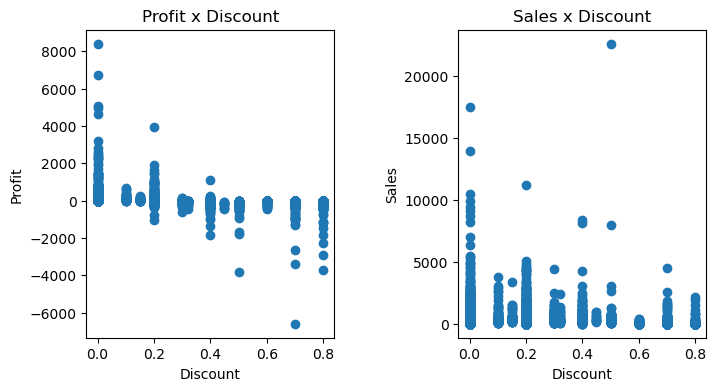

In [18]:
fg, ax = plt.subplots(1,2, figsize = (8,4))
ax[0].scatter(df["Discount"],df["Profit"])
ax[0].set_title("Profit x Discount")
ax[0].set_xlabel("Discount")
ax[0].set_ylabel("Profit")
ax[1].scatter(df["Discount"],df["Sales"])
ax[1].set_title("Sales x Discount")
ax[1].set_xlabel("Discount")
ax[1].set_ylabel("Sales")
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

              Profit
Discount            
0.00       66.900292
0.10       96.055074
0.15       27.288298
0.20       24.702572
0.30      -45.679636
0.32      -88.560656
0.40     -111.927429
0.45     -226.646464
0.50     -310.703456
0.60      -43.077212
0.70      -95.874060
0.80     -101.796797


Text(0, 0.5, 'Profit')

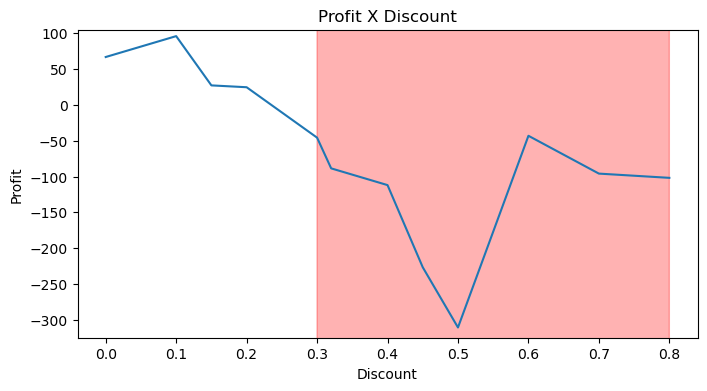

In [19]:
fig, ax = plt.subplots(1,1, figsize = (8,4))
vizProfitDiscount = df[["Profit", "Discount"]].groupby("Discount").mean()
print(vizProfitDiscount)
ax.plot(vizProfitDiscount)
ax.fill_between(vizProfitDiscount.index, vizProfitDiscount["Profit"]-(9999), vizProfitDiscount["Profit"]+(9999),where = vizProfitDiscount["Profit"]<0, color = 'red', alpha = 0.3, label = "rugi")
ax.set_ylim(-325,105)
ax.set_title("Profit X Discount")
ax.set_xlabel("Discount")
ax.set_ylabel("Profit")

Dari tabel korelasi diatas, kita bisa mengetahui bahwa:
1. **Profit** dan **Sales** mempunyai korelasi yang cukup kuat sekitar **0.51**.
2. **Profit** dan **Quantity** mendapat skor korelasi **0.23**.
3. **Quantity** dan **Sales** mendapat skor korelasi **0.32**.
4. **Profit** dan **Discount** mempunyai korelasi negatif yang cukup kuat juga sekitar **-0.54**.
5. Tapi anehnya pemberian **Discount** hampir tidak ada dampaknya terhadap **Sales**.
6. Setelah kita rata-ratakan **Profit** di berbagai skala **Discount**. Kita bisa tahu bahwa menerapkan diskon **30%** atau lebih besar akan menyebabkan kerugian.  
   
Sehingga dapat kita simpulkan semakin tinggi **Quantity** penjualan  akan meningkatkan **Sales**, semakin tinggi **Sales** dan pengurangan **Discount** akan berpengaruh dengan kenaikan **Profit**.

Kita akan membuat atribut baru dimana akan berisi informasi apakah transaksi tersebut termasuk transaksi yang profitable atau tidak.

In [20]:
df["Profitable"] = df["Profit"].apply(lambda x : "No" if x <= 0 else "Yes")
df.sample(5)

,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profitable
8827,Japan,Tokyo,APJ,JAPN,ConocoPhillips,Energy,SMB,Support,RQES8O3GLE,33.488,7,0.2,10.4650,Yes
6465,South Africa,Johannesburg,EMEA,MEA,Comcast,Communications,SMB,Marketing Suite - Gold,UBMFY1UUTY,84.960,6,0.2,6.3720,Yes
9413,Japan,Tokyo,APJ,JAPN,Bank of America Corp.,Finance,Strategic,ContactMatcher,ECFFGG0CA9,6.816,2,0.8,-11.5872,No
4277,Argentina,Buenos Aires,AMER,LATAM,Lowes,Retail,Strategic,Big Ol Database,N62XSQRABC,9099.930,7,0.0,2365.9818,Yes
8231,Finland,Vantaa,EMEA,NOR,Tesco,Retail,SMB,Marketing Suite,L8DA3X57R2,1266.860,7,0.0,291.3778,Yes


Kita mau melihat bagiaman korelasi antar attribut kategori dengan menggunakna tes uji **Chi-Square** pada setiap transaksi dengan attribut **Country, City, Region, Subregion, Customer, Industry, Segment, Product** milik customer.

In [21]:
for i in ["Country","City","Region","Subregion","Customer","Industry","Segment","Product"]:
    display(df[["Profit", i]].groupby(i).sum().T)
    crossTabData = pd.crosstab(values= df["Profit"].abs(), index = df["Profitable"], columns = df[i], aggfunc = "sum").fillna(0)
    display(crossTabData)
    stat, p_value, dof, ex = chi2_contingency(crossTabData)
    print(f"{i}\nP-Value: {p_value:.2f}")
    alpha = 0.05
    if p_value < 0.05:
        print("Ada hubungan yang signifikan antara kedua variabel.")
    else:
        print("Tidak ada hubungan yang signifikan antara kedua variabel.")

Country,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,Costa Rica,...,South Africa,South Korea,Spain,Sweden,Taiwan,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States
Profit,9772.9138,-12607.887,1059.5893,-1190.4705,24463.1876,33402.6517,-3427.9246,7031.1788,1769.0566,2037.0942,...,-5341.6936,6785.5016,18597.9504,-7490.9122,826.7231,2546.5335,3172.9762,4008.6871,74989.0891,76381.3871


Country,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,Costa Rica,...,South Africa,South Korea,Spain,Sweden,Taiwan,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States
Profitable,,,,,,,,,,,,,,,,,,,,,
No,51.2906,19501.6975,0.0000,2890.4764,0.0000,387.8706,6656.7675,71.1170,0.0000,0.0000,...,7257.0174,566.2617,0.0000,11557.9854,0.0000,0.0000,0.0000,0.0000,5031.1378,3769.6651
Yes,9824.2044,6893.8105,1059.5893,1700.0059,24463.1876,33790.5223,3228.8429,7102.2958,1769.0566,2037.0942,...,1915.3238,7351.7633,18597.9504,4067.0732,826.7231,2546.5335,3172.9762,4008.6871,80020.2269,80151.0522


Country
P-Value: 0.00
Ada hubungan yang signifikan antara kedua variabel.


City,Abu Dhabi,Adelaide,Aichi,Alexandria,Alicante,Amsterdam,Anaheim,Ankara,Antofagasta,Antwerp,...,Warsaw,Wellington,Wilmington,Winnipeg,Woking,Wollongong,Yekaterinburg,Yonkers,Zagreb,Zaragoza
Profit,1787.3023,-286.2637,-2930.8268,3.9032,318.6183,551.3632,69.982,491.2397,-476.3392,-151.502,...,2666.3701,298.0419,110.0528,38.8983,2767.7557,-106.3457,-164.1893,151.0645,394.8283,889.5239


City,Abu Dhabi,Adelaide,Aichi,Alexandria,Alicante,Amsterdam,Anaheim,Ankara,Antofagasta,Antwerp,...,Warsaw,Wellington,Wilmington,Winnipeg,Woking,Wollongong,Yekaterinburg,Yonkers,Zagreb,Zaragoza
Profitable,,,,,,,,,,,,,,,,,,,,,
No,0.0000,357.5061,4437.7913,0.0000,0.0000,0.0000,40.196,0.0000,873.8723,574.1797,...,0.0000,0.0000,0.0000,0.0000,264.9208,273.1743,230.1824,0.0000,0.0000,0.0000
Yes,1787.3023,71.2424,1506.9645,3.9032,318.6183,551.3632,110.178,491.2397,397.5331,422.6777,...,2666.3701,298.0419,110.0528,38.8983,3032.6765,166.8286,65.9931,151.0645,394.8283,889.5239


City
P-Value: 0.00
Ada hubungan yang signifikan antara kedua variabel.


Region,AMER,APJ,EMEA
Profit,127426.9898,11513.9869,147456.045


Region,AMER,APJ,EMEA
Profitable,,,
No,32615.5940,57043.8543,66471.8374
Yes,160042.5838,68557.8412,213927.8824


Region
P-Value: 0.00
Ada hubungan yang signifikan antara kedua variabel.


Subregion,ANZ,APAC,EU,EU-EAST,EU-WEST,IND,JAPN,LATAM,MEA,NAMER,NOR,UKIR
Profit,-11450.7709,30311.1778,8401.8004,3864.4893,26706.6029,18382.9363,-25729.3563,17642.951,7200.1468,109784.0388,16044.7604,85238.2452


Subregion,ANZ,APAC,EU,EU-EAST,EU-WEST,IND,JAPN,LATAM,MEA,NAMER,NOR,UKIR
Profitable,,,,,,,,,,,,
No,19507.3918,723.2750,0.0000,9115.8034,33260.1110,0.0000,36813.1875,28458.0583,7276.6320,4157.5357,11788.1532,5031.1378
Yes,8056.6209,31034.4528,8401.8004,12980.2927,59966.7139,18382.9363,11083.8312,46101.0093,14476.7788,113941.5745,27832.9136,90269.3830


Subregion
P-Value: 0.00
Ada hubungan yang signifikan antara kedua variabel.


Customer,AT&T,Abbott Laboratories,Aetna,Airbus,Allianz,Allstate,Alphabet,Amazon,American Express,AmerisourceBergen,...,Tyson Foods,United Parcel Service,UnitedHealth Group,Valero Energy,Verizon Communications,Volkswagen,Walgreens,Walmart,Walt Disney,Wells Fargo
Profit,4520.6641,2281.7391,3312.6698,5593.3657,5531.8834,-2796.2935,3980.3457,2163.9843,5436.2589,4202.8824,...,1690.5775,5275.6332,4876.5754,10308.6297,2044.6004,4546.191,-740.6747,3111.1277,5786.8297,2341.1471


Customer,AT&T,Abbott Laboratories,Aetna,Airbus,Allianz,Allstate,Alphabet,Amazon,American Express,AmerisourceBergen,...,Tyson Foods,United Parcel Service,UnitedHealth Group,Valero Energy,Verizon Communications,Volkswagen,Walgreens,Walmart,Walt Disney,Wells Fargo
Profitable,,,,,,,,,,,,,,,,,,,,,
No,2277.0337,408.3120,1702.7482,1236.0287,1131.7345,9210.0725,482.4894,2109.6897,1105.3926,2769.0122,...,4924.4428,241.2801,1157.6484,974.3078,944.7598,2378.0971,3127.9812,999.1952,1186.8091,1344.0421
Yes,6797.6978,2690.0511,5015.4180,6829.3944,6663.6179,6413.7790,4462.8351,4273.6740,6541.6515,6971.8946,...,6615.0203,5516.9133,6034.2238,11282.9375,2989.3602,6924.2881,2387.3065,4110.3229,6973.6388,3685.1892


Customer
P-Value: 0.00
Ada hubungan yang signifikan antara kedua variabel.


Industry,Communications,Consumer Products,Energy,Finance,Healthcare,Manufacturing,Misc,Retail,Tech,Transportation
Profit,13976.341,37018.0077,45282.3137,50348.9696,31969.0932,38413.1064,7163.629,30207.8208,24615.0436,7402.6967


Industry,Communications,Consumer Products,Energy,Finance,Healthcare,Manufacturing,Misc,Retail,Tech,Transportation
Profitable,,,,,,,,,,
No,8863.526,12437.6166,15610.9069,36294.0884,16351.6286,19308.6490,942.8989,15546.5872,22732.9421,8042.4420
Yes,22839.867,49455.6243,60893.2206,86643.0580,48320.7218,57721.7554,8106.5279,45754.4080,47347.9857,15445.1387


Industry
P-Value: 0.00
Ada hubungan yang signifikan antara kedua variabel.


Segment,Enterprise,SMB,Strategic
Profit,60298.6785,134119.2092,91979.134


Segment,Enterprise,SMB,Strategic
Profitable,,,
No,26398.3669,84945.7112,44787.2076
Yes,86697.0454,219064.9204,136766.3416


Segment
P-Value: 0.00
Ada hubungan yang signifikan antara kedua variabel.


Product,Alchemy,Big Ol Database,ChatBot Plugin,ContactMatcher,Data Smasher,FinanceHub,Marketing Suite,Marketing Suite - Gold,OneView,SaaS Connector Pack,SaaS Connector Pack - Gold,Site Analytics,Storage,Support
Profit,55617.8249,3384.7569,6527.787,12496.2822,41936.6357,32136.4203,-3472.556,21278.8264,18138.0054,13059.1436,6964.1767,44515.7306,949.5182,32864.4698


Product,Alchemy,Big Ol Database,ChatBot Plugin,ContactMatcher,Data Smasher,FinanceHub,Marketing Suite,Marketing Suite - Gold,OneView,SaaS Connector Pack,SaaS Connector Pack - Gold,Site Analytics,Storage,Support
Profitable,,,,,,,,,,,,,,
No,0.0000,30118.6682,0.000,70922.6447,930.6265,9880.8413,12152.206,6426.3038,8629.6412,6490.9134,0.0000,7530.6235,33.1952,3015.6219
Yes,55617.8249,33503.4251,6527.787,83418.9269,42867.2622,42017.2616,8679.650,27705.1302,26767.6466,19550.0570,6964.1767,52046.3541,982.7134,35880.0917


Product
P-Value: 0.00
Ada hubungan yang signifikan antara kedua variabel.


Dapat kita lihat ternyata faktor yang menyebabkan ruginya suatu transaksi sangat berkaitan erat hubungannya dengan **Country, City, Region, Subregion, Customer, Product**. Maka kita akan tampilkan visualisasi bar chart dari beberapa atribut tersebut guna mempermudah untuk dalam hal penganalisisan.

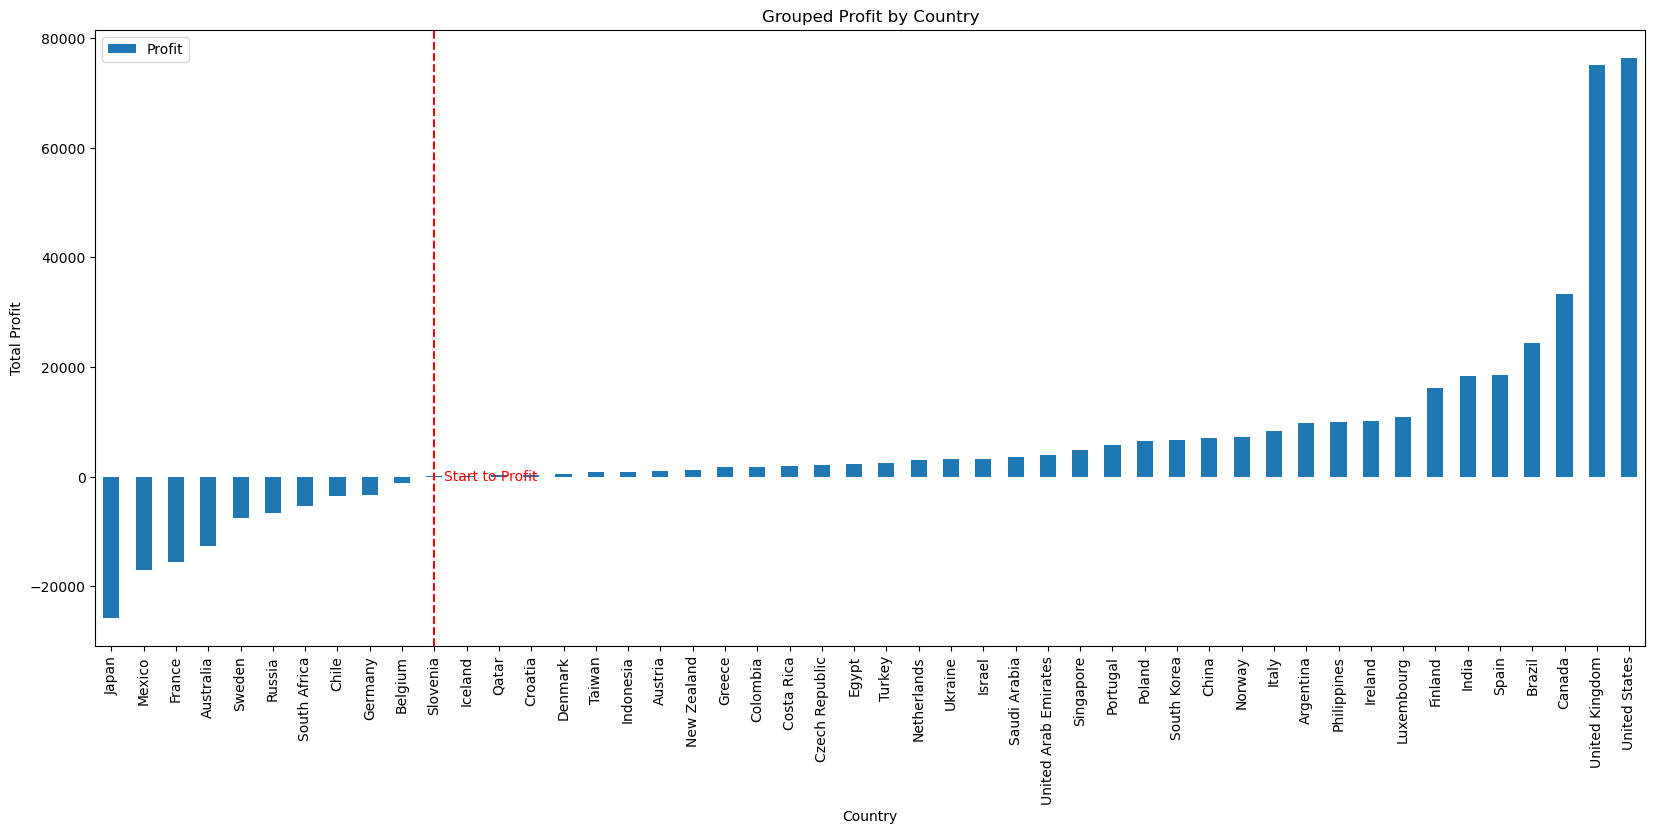

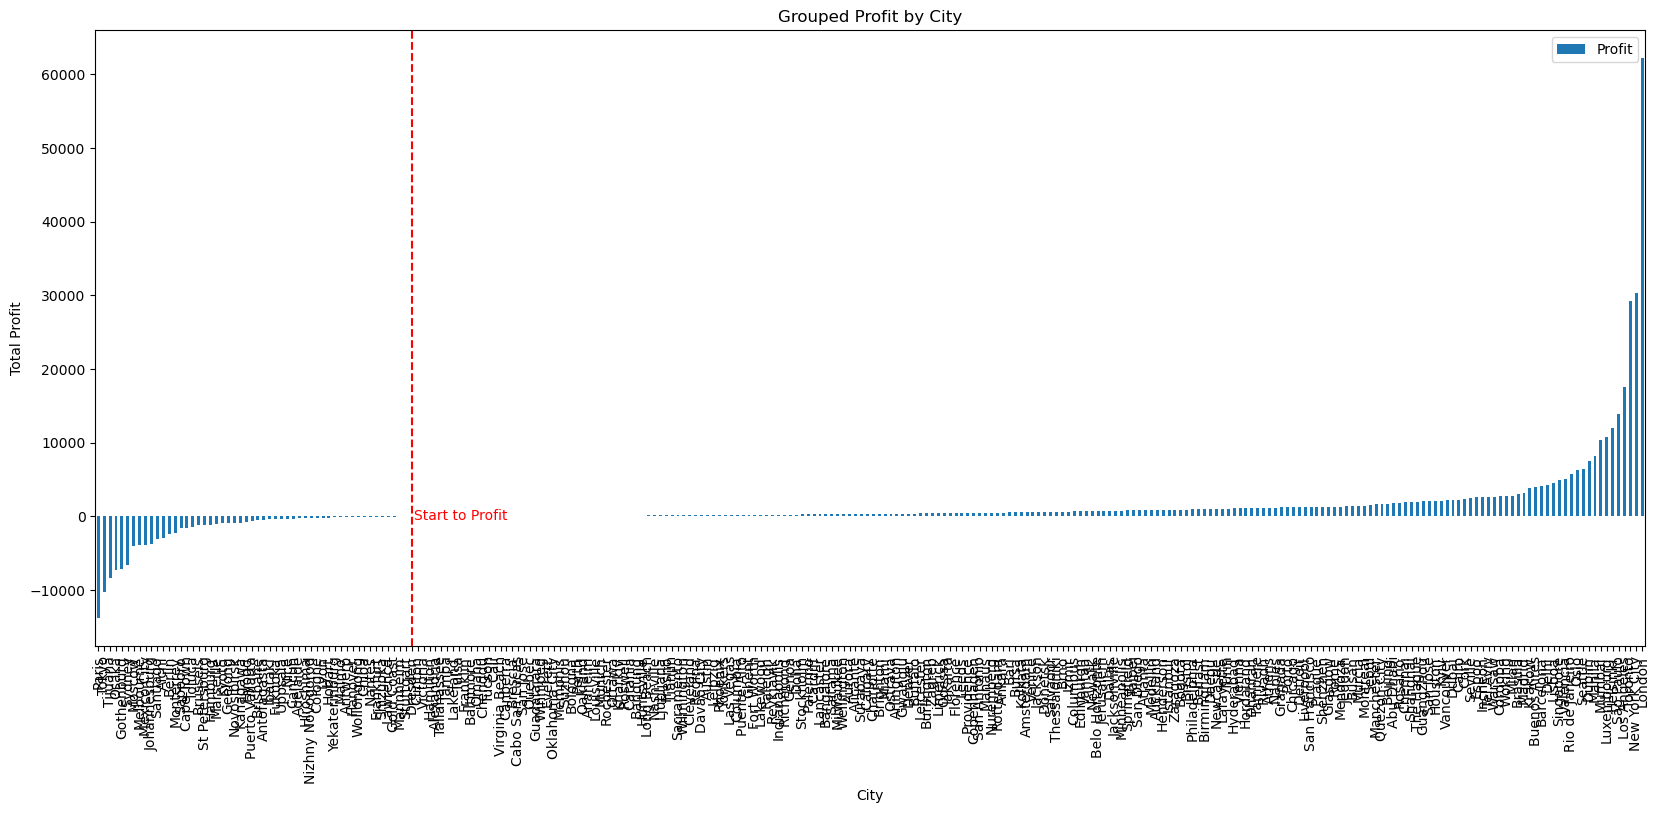

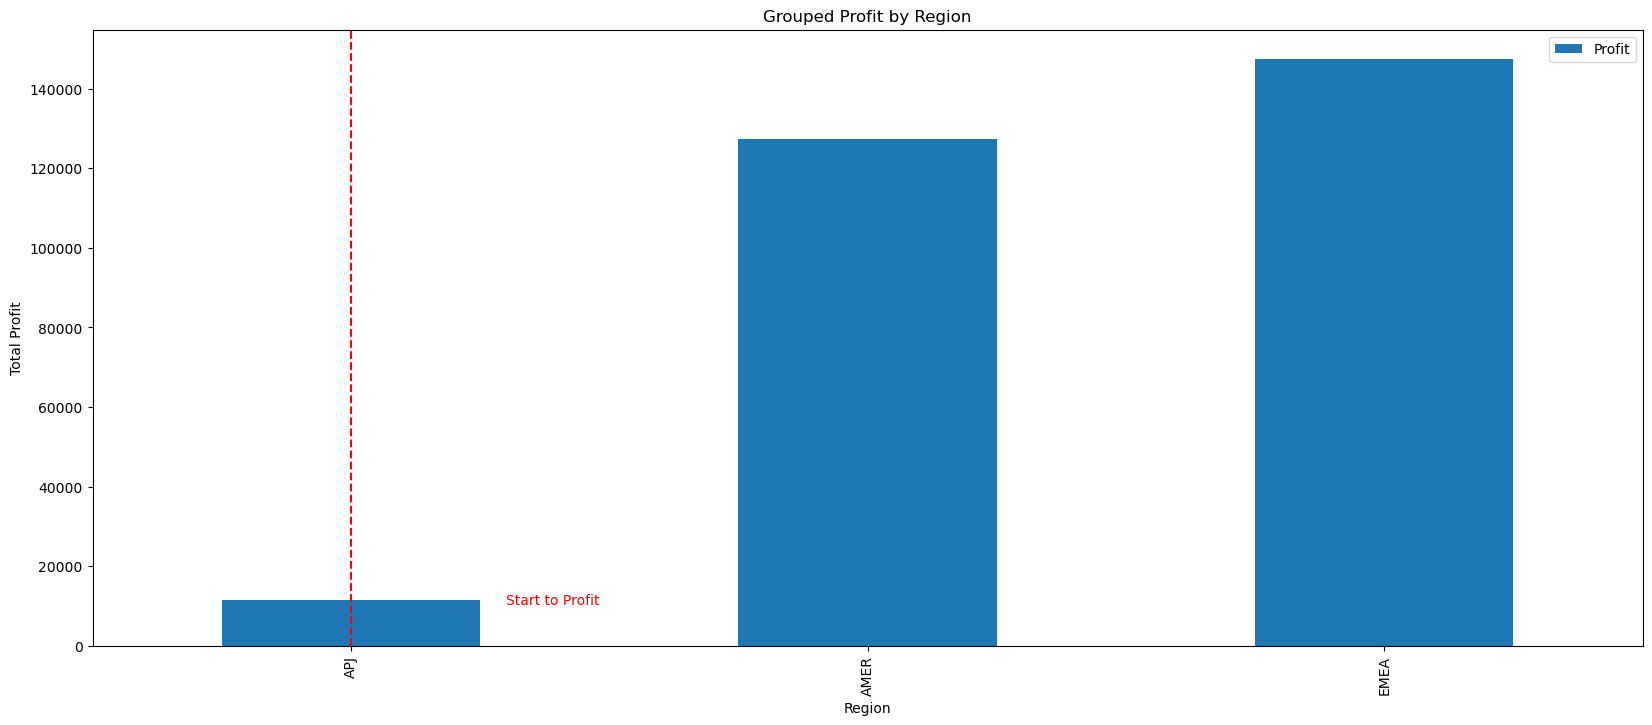

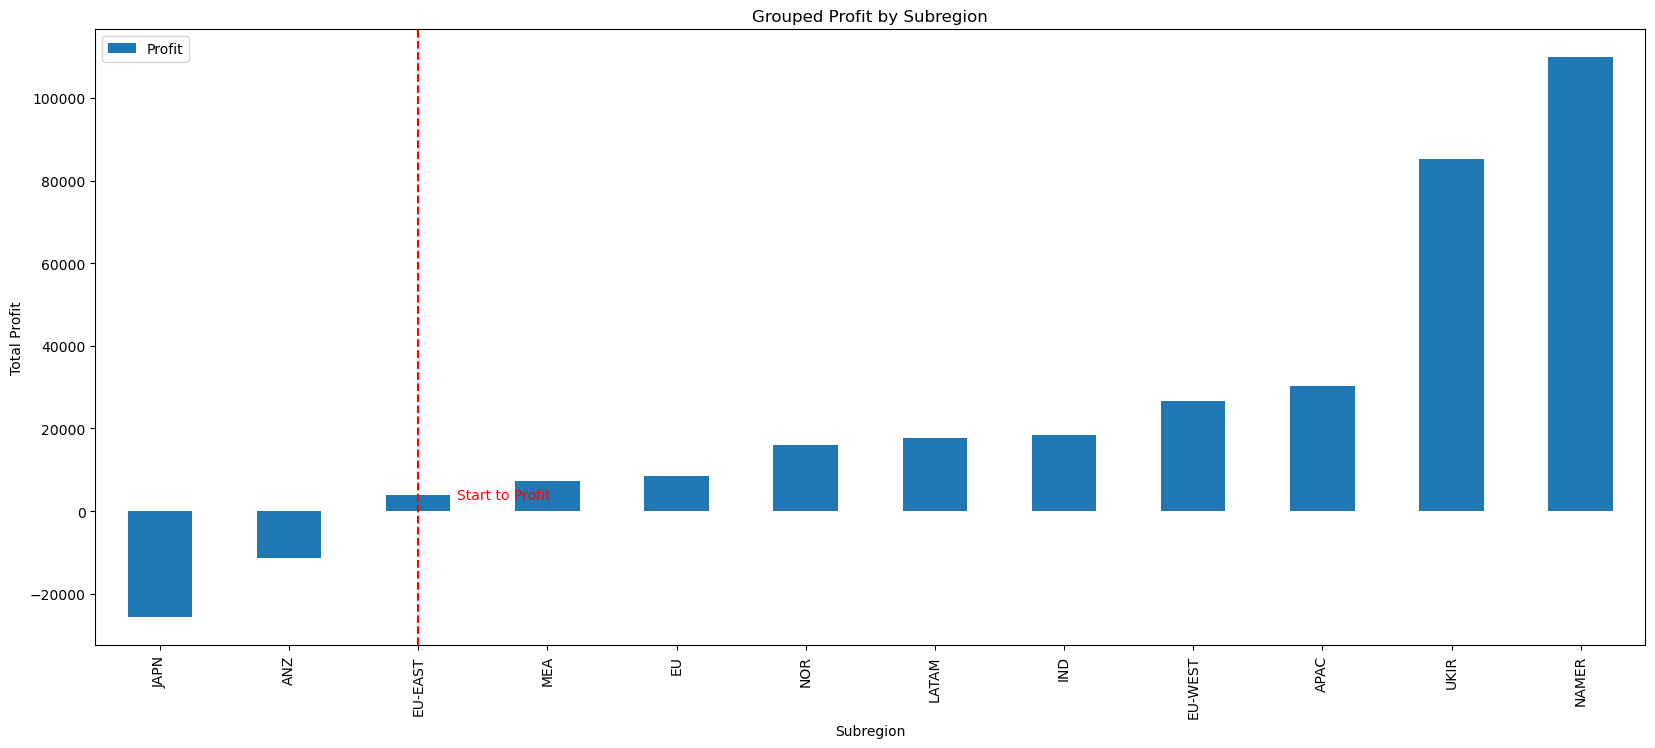

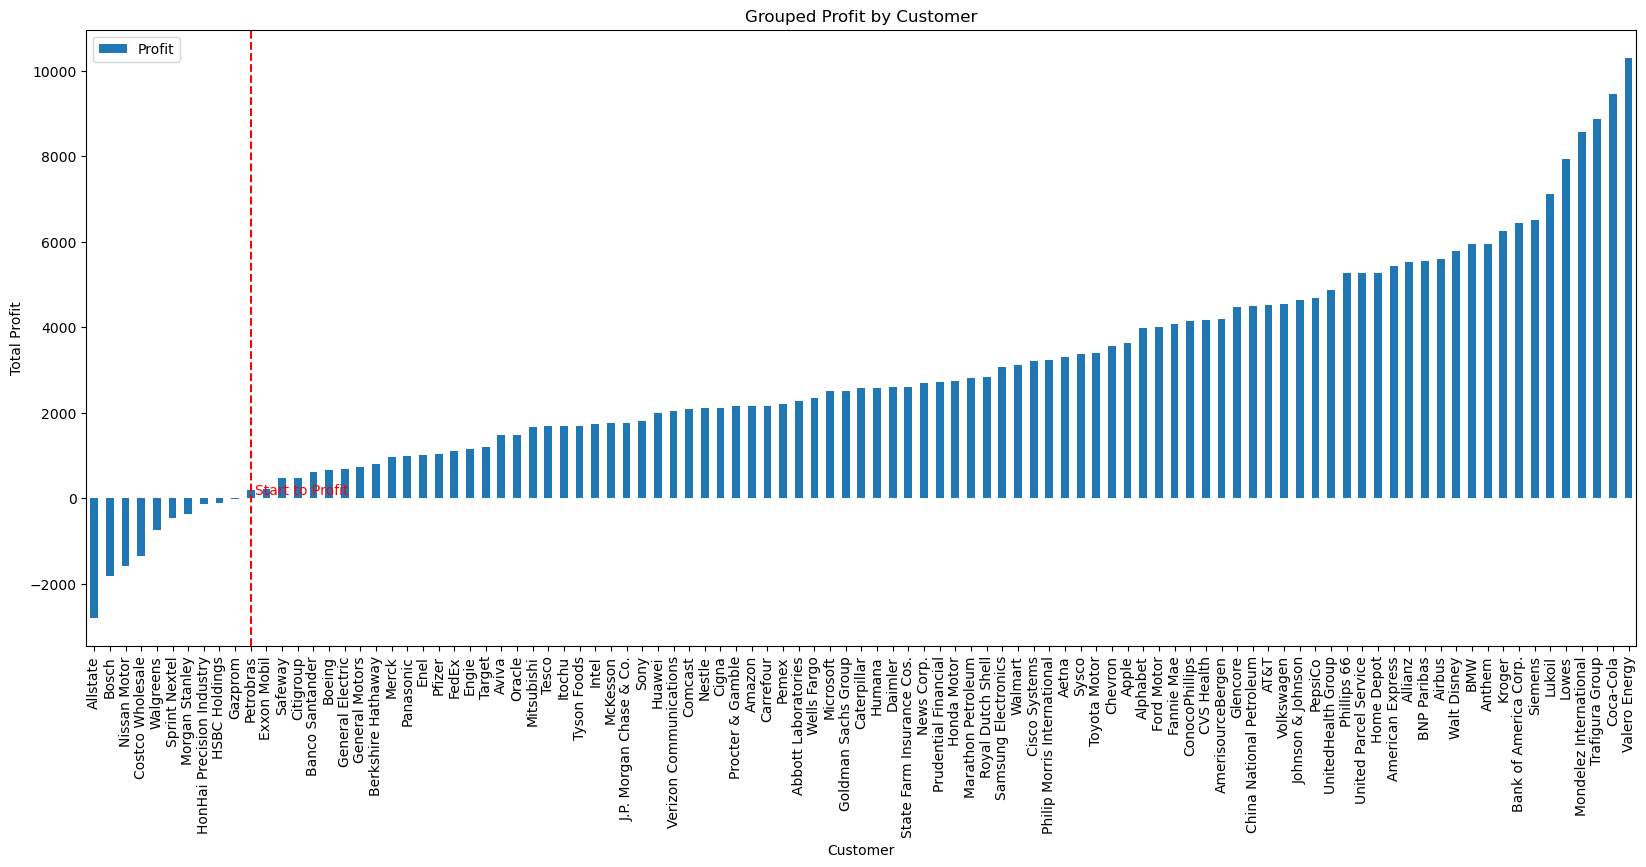

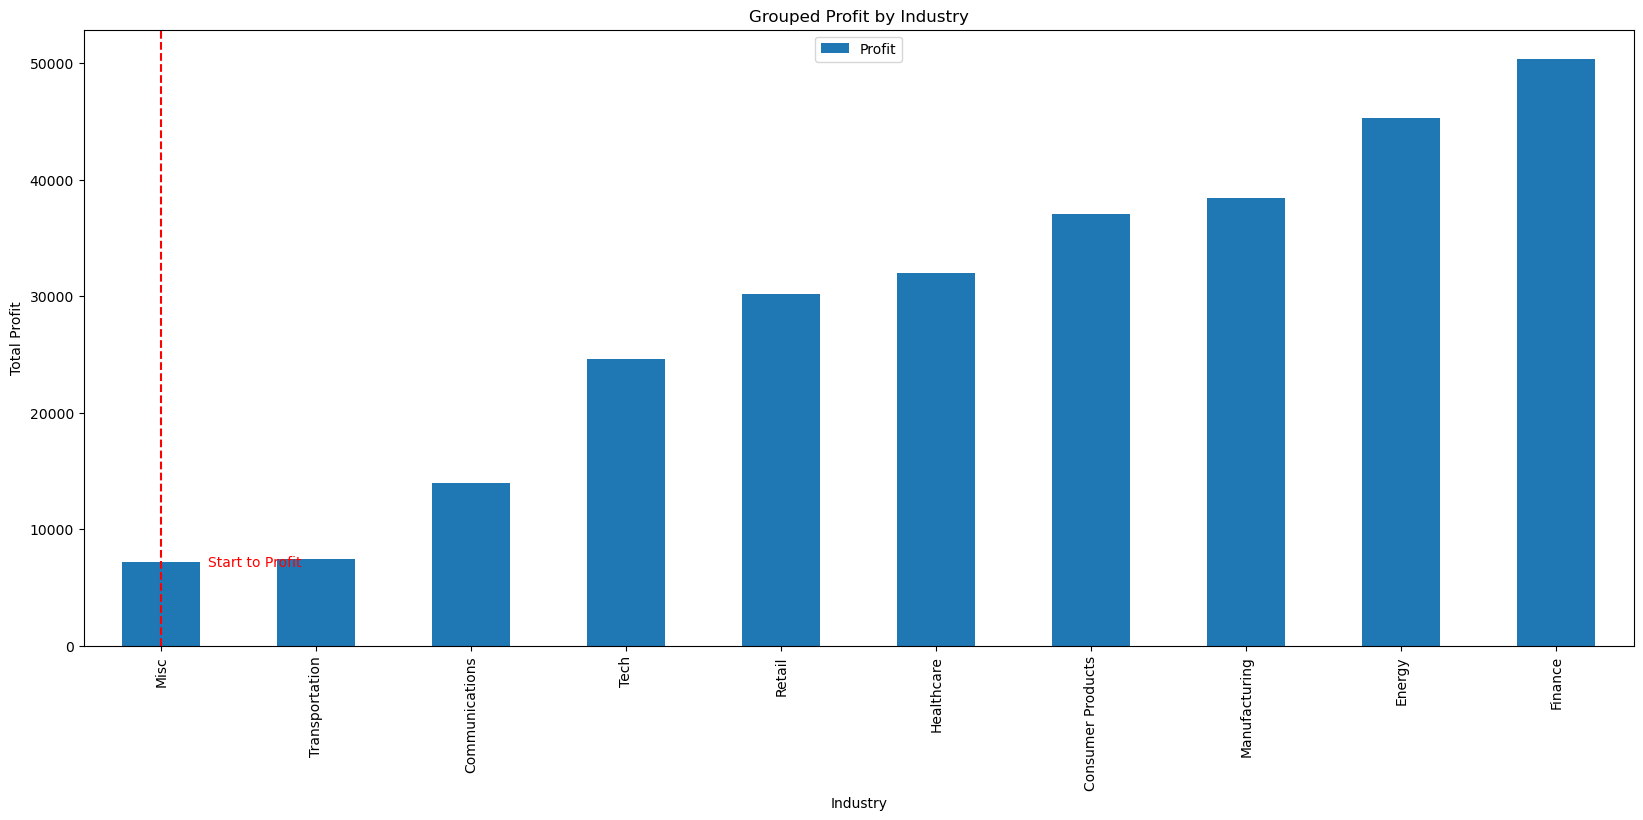

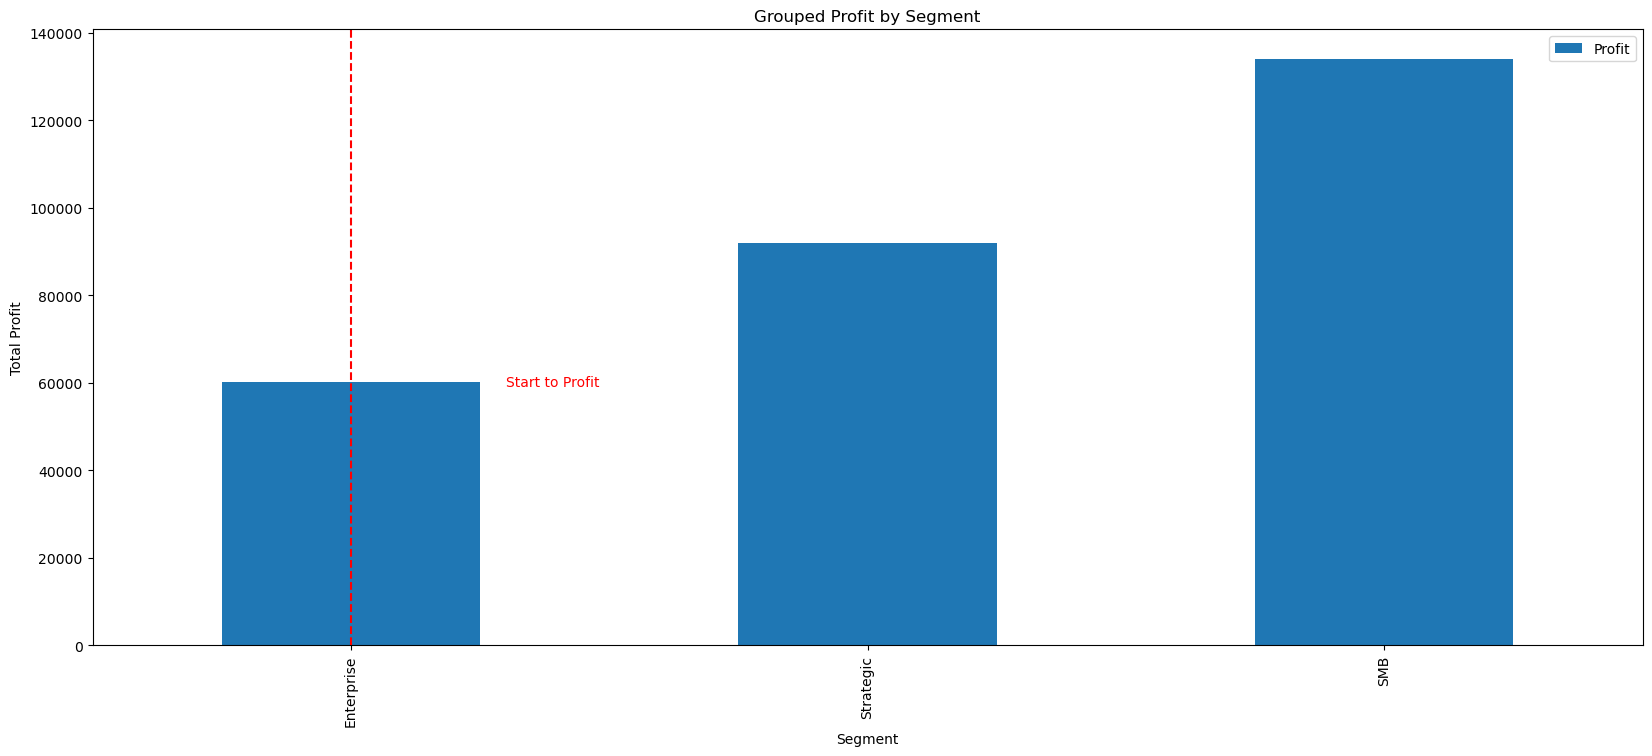

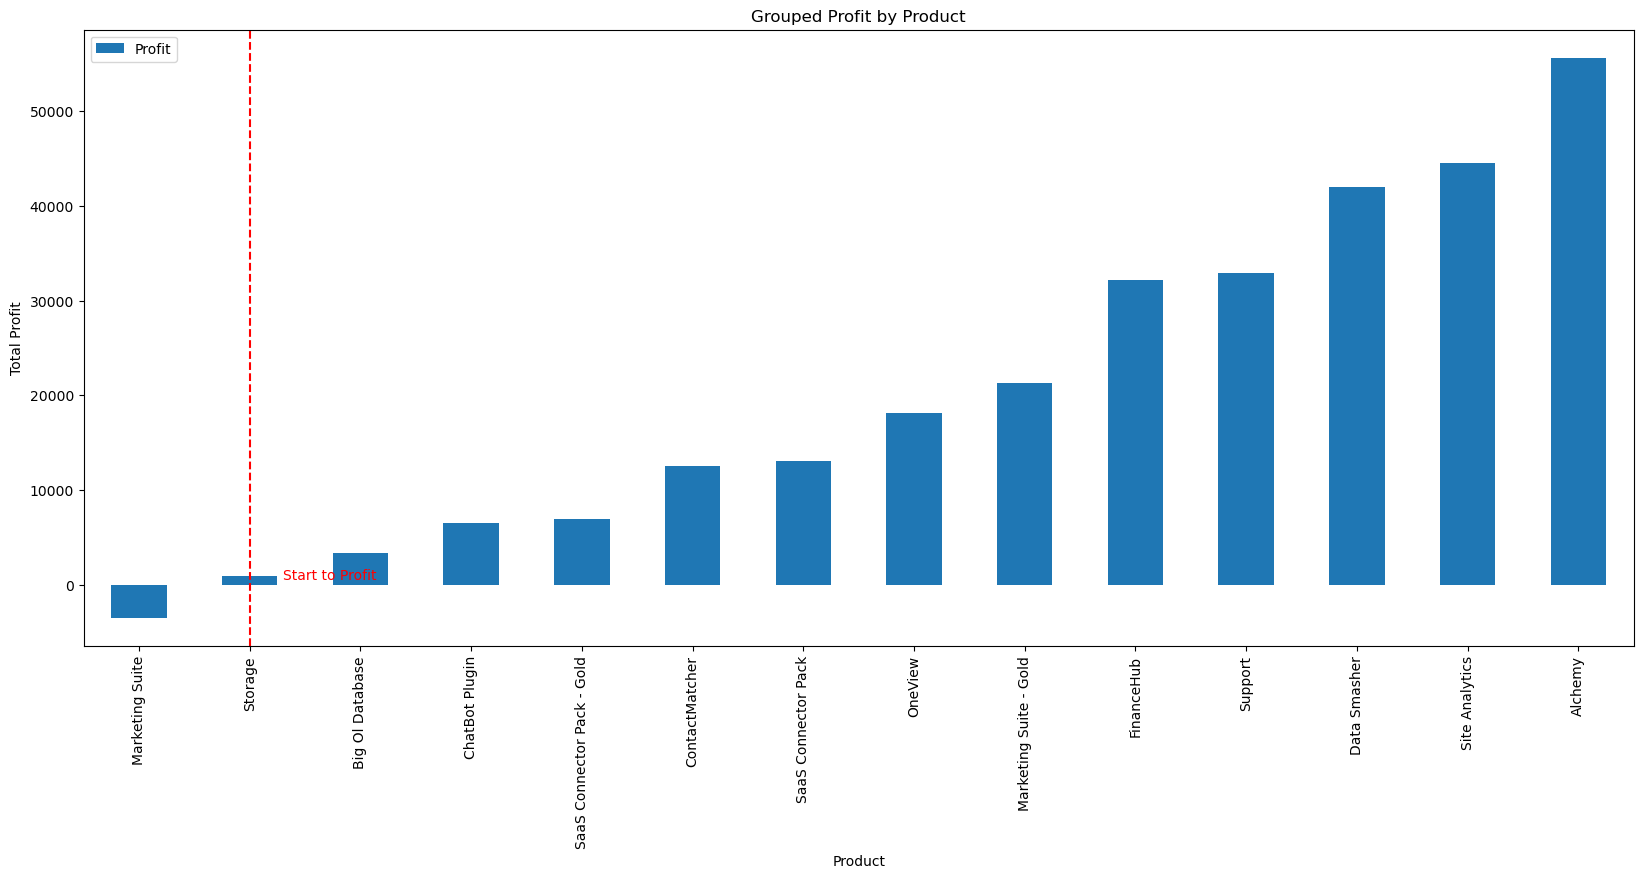

In [22]:
for i in ["Country","City","Region","Subregion","Customer","Industry","Segment","Product"]:
    crossTabData = pd.crosstab(values= df["Profit"].abs(), columns = df["Profitable"], index = df[i], aggfunc = "sum").fillna(0)
    grouped = df[["Profit", i]].groupby(i).sum().sort_values(by="Profit")
    ax = grouped.plot(kind='bar', figsize=(20, 8))
    for idx, value in enumerate(grouped['Profit']):
        if value > 0:
            ax.axvline(x=idx, color='red', linestyle='--', ymax=1.05)
            ax.text(idx + 0.3, value, f'Start to Profit', ha='left', va='center', color='red')
            break
    plt.title(f'Grouped Profit by {i}')
    plt.xlabel(i)
    plt.ylabel('Total Profit')
    plt.show()

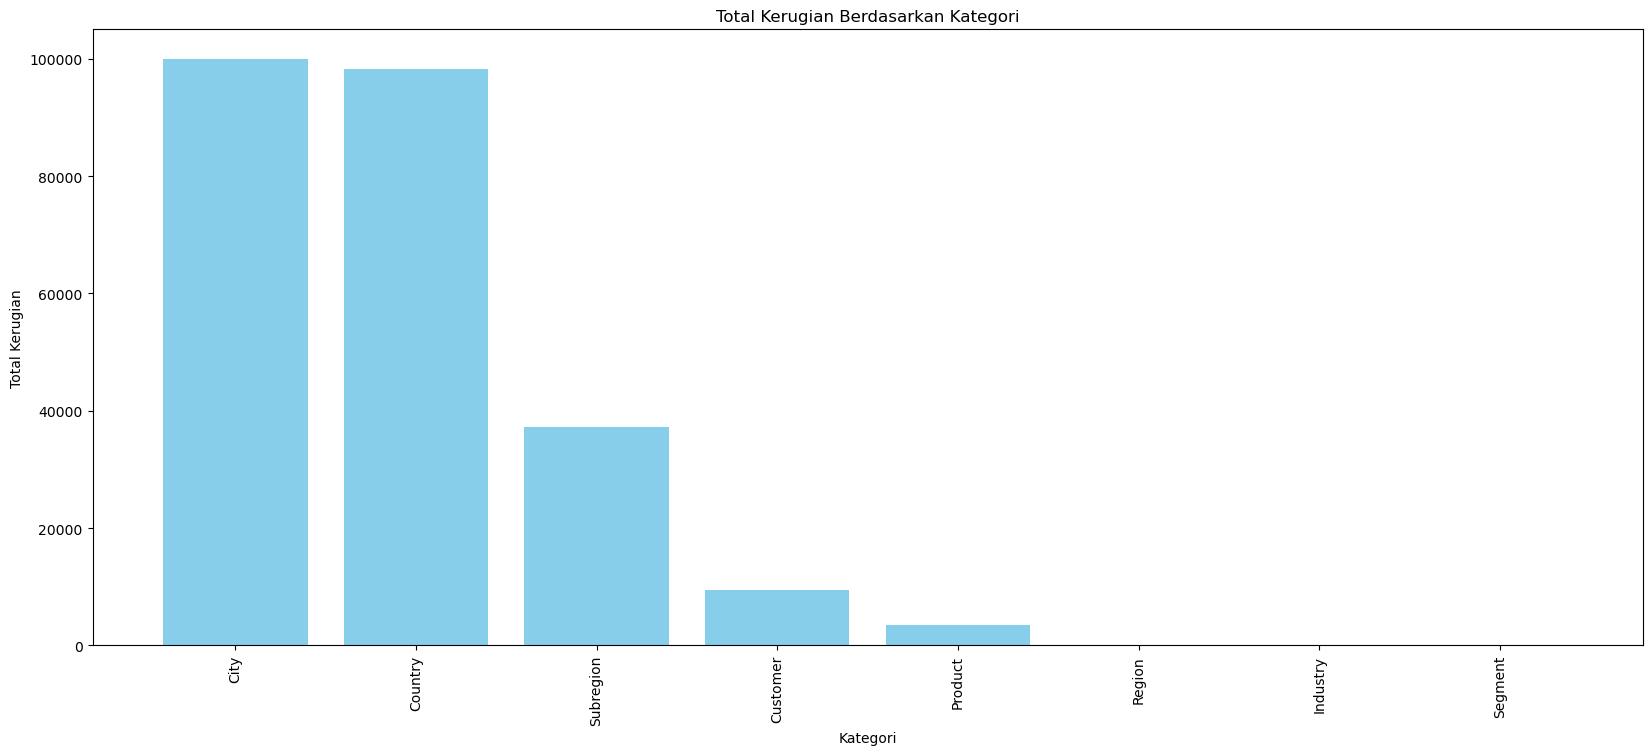

In [43]:
unprofitData = {}
for i in ["Country","City","Region","Subregion","Customer","Industry","Segment","Product"]:
    grouped = df[["Profit",i]].groupby(i).sum()
    grouped = grouped[grouped<0].sum().sum()
    unprofitData[i] = grouped
unprofitData = {k:v for k,v in sorted(unprofitData.items(), key = lambda x: x[1])}
plt.figure(figsize=(20,8))
plt.bar(unprofitData.keys(), [abs(i) for i in unprofitData.values()], color='skyblue')
plt.xlabel('Kategori')
plt.ylabel('Total Kerugian')
plt.xticks(rotation = 90)
plt.title('Total Kerugian Berdasarkan Kategori')

# Menampilkan plot
plt.show()

Kita sudah mendapatkan gambaran mengenai kerugian di dalam attribut yang spesifik. Meskipun kita telah tahu dimana variabel pada attribut spesifik mana kita mengalami kerugian (contohnya dengan mengelompokan menjadi per kota, kita bisa melihat bahwa kerugian kita hampir mencapai **100,000**), tetapi hal ini masih sangat bias dan belum cukup. Kita akan menganalisis lebih spesifik dengan memasangkan beberapa atribut untuk mencari transaksi pada atribut yang berkaitan mana yang menyebabkan kerugian terbesar.

In [23]:
attributeCombinations = list(itertools.combinations( ["Country","City","Region","Subregion","Customer","Industry","Segment","Product"], r=2))
listUnprofit = {}
listObjMap = {}
listTotalUnprofit = {}
for i,j in attributeCombinations:
        crossTabData = pd.crosstab(values= df["Profit"], index = df[i], columns= df[j], aggfunc = "sum").fillna(0)
        display(crossTabData)
        listObjMap[str(i)+" & "+str(j)] = crossTabData.T < 0 
        listUnprofit[str(i)+" & "+str(j)] = {}
        for x,y in crossTabData.items():
            for z in y[y<0]:
                # print(y[y==z].index[-1])
                y1 = y[y==z].index[-1]
                listUnprofit[str(i)+" & "+str(j)][str(x) + " & " + str(y1)] = round(z)
        listUnprofit[str(i)+" & "+str(j)] = dict(sorted(listUnprofit[str(i)+" & "+str(j)].items(), key=lambda item: item[1]))
        print(f"Daftar Transaksi yang merugi:\n")
        for x,y in listUnprofit[str(i)+" & "+str(j)].items():
            print(x, y)
            total_kerugian = sum(list(listUnprofit[f"{i} & {j}"].values()))
            listTotalUnprofit [str(i)+" & "+str(j)] = total_kerugian
        listTotalUnprofit = dict(sorted(listTotalUnprofit.items(), key=lambda item: item[1]))    
        print(f"\nTotal Kerugian: {listTotalUnprofit[str(i) + ' & ' + str(j)]}")

City,Abu Dhabi,Adelaide,Aichi,Alexandria,Alicante,Amsterdam,Anaheim,Ankara,Antofagasta,Antwerp,...,Warsaw,Wellington,Wilmington,Winnipeg,Woking,Wollongong,Yekaterinburg,Yonkers,Zagreb,Zaragoza
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Australia,0.0000,-286.2637,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.000,...,0.0000,0.0000,0.0000,0.0000,0.0000,-106.3457,0.0000,0.0000,0.0000,0.0000
Austria,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Belgium,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,-151.502,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Brazil,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Canada,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.000,...,0.0000,0.0000,0.0000,38.8983,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Chile,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,-476.3392,0.000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
China,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Colombia,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Daftar Transaksi yang merugi:

Paris & France -13838
Tokyo & Japan -10360
Tijuana & Mexico -8457
Osaka & Japan -7334
Gothenburg & Sweden -7188
Sydney & Australia -6655
Moscow & Russia -4030
Melbourne & Australia -3920
Mexico City & Mexico -3860
Johannesburg & South Africa -3799
Santiago & Chile -3113
Aichi & Japan -2931
Berlin & Germany -2446
Monterrey & Mexico -2292
Sapporo & Japan -1553
Cape Town & South Africa -1543
Toluca & Mexico -1420
Brussels & Belgium -1208
St Petersburg & Russia -1180
Hamburg & Germany -1134
Marseille & France -1003
Kyoto & Japan -970
Geelong & Australia -967
Novosibirsk & Russia -901
Kanagawa & Japan -878
Hyogo & Japan -748
Puerto Vallarta & Mexico -671
Brisbane & Australia -500
Antofagasta & Chile -476
Ibaraki & Japan -427
Fukuoka & Japan -399
Uppsala & Sweden -399
Nice & France -395
Cancun & Mexico -340
Adelaide & Australia -286
Hiroshima & Japan -268
Nizhny Novogorod & Russia -253
Cologne & Germany -239
Lyon & France -222
Hobart & Australia -216
Yekaterinb

Region,AMER,APJ,EMEA
Country,,,
Argentina,9772.9138,0.0000,0.0000
Australia,0.0000,-12607.8870,0.0000
Austria,0.0000,0.0000,1059.5893
Belgium,0.0000,0.0000,-1190.4705
Brazil,24463.1876,0.0000,0.0000
Canada,33402.6517,0.0000,0.0000
Chile,-3427.9246,0.0000,0.0000
China,0.0000,7031.1788,0.0000
Colombia,1769.0566,0.0000,0.0000


Daftar Transaksi yang merugi:

APJ & Japan -25729
AMER & Mexico -16971
EMEA & France -15560
APJ & Australia -12608
EMEA & Sweden -7491
EMEA & Russia -6528
EMEA & South Africa -5342
AMER & Chile -3428
EMEA & Germany -3399
EMEA & Belgium -1190

Total Kerugian: -98246


Subregion,ANZ,APAC,EU,EU-EAST,EU-WEST,IND,JAPN,LATAM,MEA,NAMER,NOR,UKIR
Country,,,,,,,,,,,,
Argentina,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9772.9138,0.0000,0.0000,0.0000,0.0000
Australia,-12607.8870,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Austria,0.0000,0.0000,0.0000,0.0000,1059.5893,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Belgium,0.0000,0.0000,0.0000,0.0000,-1190.4705,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Brazil,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,24463.1876,0.0000,0.0000,0.0000,0.0000
Canada,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,33402.6517,0.0000,0.0000
Chile,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-3427.9246,0.0000,0.0000,0.0000,0.0000
China,0.0000,7031.1788,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Colombia,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1769.0566,0.0000,0.0000,0.0000,0.0000


Daftar Transaksi yang merugi:

JAPN & Japan -25729
LATAM & Mexico -16971
EU-WEST & France -15560
ANZ & Australia -12608
NOR & Sweden -7491
EU-EAST & Russia -6528
MEA & South Africa -5342
LATAM & Chile -3428
EU-WEST & Germany -3399
EU-WEST & Belgium -1190

Total Kerugian: -98246


Customer,AT&T,Abbott Laboratories,Aetna,Airbus,Allianz,Allstate,Alphabet,Amazon,American Express,AmerisourceBergen,...,Tyson Foods,United Parcel Service,UnitedHealth Group,Valero Energy,Verizon Communications,Volkswagen,Walgreens,Walmart,Walt Disney,Wells Fargo
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,355.8785,0.0000,98.1050,0.0000,2.1582,707.0273,0.0000,0.0000,391.2515,0.0000,...,160.9451,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,355.5820,10.4148
Australia,-10.6240,-195.3901,-19.3996,-20.6176,-188.8088,67.4424,-108.8304,-738.8178,-286.6779,-348.2542,...,-486.3957,-9.5564,-45.6933,-19.9123,80.9973,-123.2642,-92.7666,-490.2531,-16.7696,0.0000
Austria,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Belgium,0.0000,0.0000,13.8141,-39.7414,0.0000,0.0000,0.0000,-166.1292,0.0000,142.1402,...,18.2106,0.0000,0.0000,38.7792,0.7152,-22.1459,-3.7880,115.2038,0.0000,0.0000
Brazil,235.8448,643.1031,291.5148,654.1618,26.9010,0.0000,2602.0939,44.1476,400.1121,114.6576,...,60.0156,0.0000,1437.6230,5058.0601,0.0000,573.5982,0.0000,0.0000,64.0595,138.1268
Canada,162.6895,173.5046,110.1480,334.9818,298.8142,1631.2032,0.0000,146.8956,549.0198,900.3966,...,237.6882,-6.9282,1125.9087,1064.2515,24.0592,469.5486,0.0000,195.8238,66.1182,0.0000
Chile,0.0000,-109.7374,-23.0856,106.8757,-12.1296,83.5128,0.0000,-0.3888,-6.7236,38.7897,...,-644.1788,0.0000,0.0000,-186.9344,27.3663,-41.8465,0.0000,0.0000,-142.1216,8.8020
China,0.0000,8.5914,0.0000,96.4755,0.0000,0.0000,0.0000,25.1916,438.4080,46.1733,...,174.2012,0.0000,0.0000,0.0000,113.5934,991.3618,220.1711,0.0000,0.0000,0.0000
Colombia,3.7920,0.0000,0.0000,87.3504,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,21.7515,22.0254,19.1880,0.0000


Daftar Transaksi yang merugi:

Allstate & Mexico -6892
Costco Wholesale & Sweden -3818
Bosch & Japan -3719
FedEx & Russia -3424
Ford Motor & Australia -2930
Itochu & Japan -2248
Nissan Motor & Japan -2211
Walgreens & Mexico -2021
Intel & France -1927
Morgan Stanley & Sweden -1835
Anthem & Germany -1700
Volkswagen & Japan -1642
AT&T & France -1607
Tyson Foods & Mexico -1416
BMW & Sweden -1286
Merck & Japan -1232
Mitsubishi & Australia -1232
AmerisourceBergen & France -1208
Morgan Stanley & South Africa -1148
Sprint Nextel & South Africa -1145
Humana & Japan -1134
Fannie Mae & Japan -1092
HSBC Holdings & Australia -1075
Allstate & Germany -1059
Tyson Foods & Japan -1052
Lukoil & South Africa -1048
Sprint Nextel & Japan -1006
HonHai Precision Industry & Mexico -995
HSBC Holdings & France -991
Bosch & South Africa -964
Aetna & Sweden -935
Toyota Motor & South Africa -910
Itochu & Russia -877
Itochu & Chile -857
Royal Dutch Shell & Germany -844
Coca-Cola & Japan -821
ConocoPhillips & Japan 

Industry,Communications,Consumer Products,Energy,Finance,Healthcare,Manufacturing,Misc,Retail,Tech,Transportation
Country,,,,,,,,,,
Argentina,714.3517,522.6263,778.0660,2064.8019,287.5971,370.4444,0.0000,3385.3124,1295.8551,353.8589
Australia,-318.5788,-316.9325,15.1312,-1203.9995,-1293.0789,-5079.7116,-389.4550,-1734.3312,-2330.8943,43.9636
Austria,0.0000,0.0000,1011.2965,0.0000,0.0000,0.0000,0.0000,35.0640,13.2288,0.0000
Belgium,1.3056,-201.3389,-27.1567,-94.4528,158.5949,-706.4081,7.7450,20.0648,-369.5180,20.6937
Brazil,1028.1501,1213.5481,6868.9603,1710.8260,3717.2795,3837.0546,455.1662,999.2040,4354.2548,278.7440
Canada,397.8680,7881.1869,2836.8107,7525.5037,5763.4249,4252.7165,72.7094,1669.3629,2749.8863,253.1824
Chile,-124.0281,-661.7350,-610.9814,-533.0572,-208.5031,146.7260,-1.0428,-642.6303,-799.2274,6.5547
China,113.5934,314.3664,646.1820,1761.7988,499.6005,2574.9625,0.0000,469.7043,650.9709,0.0000
Colombia,22.9800,756.0033,5.3898,33.2156,0.0000,644.4453,0.0000,146.2816,138.0934,22.6476


Daftar Transaksi yang merugi:

Finance & Mexico -8128
Finance & Japan -6317
Tech & Japan -5494
Manufacturing & Australia -5080
Transportation & Russia -4056
Retail & Sweden -3595
Tech & France -3595
Healthcare & Japan -2731
Energy & Japan -2445
Finance & France -2441
Tech & Australia -2331
Consumer Products & France -2292
Manufacturing & Japan -2207
Consumer Products & Japan -2205
Transportation & Japan -2102
Finance & Sweden -2091
Healthcare & France -1959
Retail & Mexico -1835
Communications & France -1780
Healthcare & Germany -1743
Finance & Russia -1742
Retail & Australia -1734
Energy & Germany -1709
Consumer Products & Mexico -1541
Energy & France -1411
Communications & South Africa -1364
Healthcare & Australia -1293
Healthcare & Mexico -1255
Retail & France -1240
Energy & South Africa -1228
Finance & Australia -1204
Tech & South Africa -1178
Communications & Japan -1168
Manufacturing & Mexico -1163
Communications & Mexico -1091
Tech & Mexico -1043
Manufacturing & Sweden -932
Ener

Segment,Enterprise,SMB,Strategic
Country,,,
Argentina,1187.1717,3415.2536,5170.4885
Australia,-2644.1119,-5470.8934,-4492.8817
Austria,48.2928,1011.2965,0.0000
Belgium,-532.4789,-838.7355,180.7439
Brazil,5696.1379,12950.5232,5816.5265
Canada,4289.4352,19817.3052,9295.9113
Chile,-1215.9561,-1423.0527,-788.9158
China,719.2908,3271.5449,3040.3431
Colombia,12.4416,1012.0717,744.5433


Daftar Transaksi yang merugi:

SMB & Japan -20596
SMB & Mexico -11275
SMB & France -7291
SMB & Australia -5471
Strategic & France -5197
Strategic & Mexico -4947
Strategic & Australia -4493
Enterprise & Russia -4347
Strategic & Japan -4048
Strategic & Sweden -3812
SMB & South Africa -3591
Enterprise & France -3071
SMB & Sweden -2689
Enterprise & Australia -2644
Enterprise & Germany -1844
SMB & Russia -1615
SMB & Chile -1423
Strategic & Germany -1418
Enterprise & Chile -1216
Enterprise & South Africa -1111
Enterprise & Japan -1085
Enterprise & Sweden -990
SMB & Belgium -839
Strategic & Chile -789
Enterprise & Mexico -749
Strategic & South Africa -640
Strategic & Russia -566
Enterprise & Belgium -532
SMB & Germany -137
SMB & Iceland -77

Total Kerugian: -98503


Product,Alchemy,Big Ol Database,ChatBot Plugin,ContactMatcher,Data Smasher,FinanceHub,Marketing Suite,Marketing Suite - Gold,OneView,SaaS Connector Pack,SaaS Connector Pack - Gold,Site Analytics,Storage,Support
Country,,,,,,,,,,,,,,
Argentina,0.0000,2709.9522,203.2929,1597.7882,349.6286,563.0471,141.3920,779.1128,1203.4380,311.3153,72.1862,1110.6172,15.1108,716.0325
Australia,1831.9666,326.0395,138.9541,-11514.0689,981.8644,-1501.2333,-555.8726,-257.4584,-2482.4187,-2631.9766,132.5294,1682.6887,43.9949,1197.1039
Austria,0.0000,648.5624,22.0974,4.4344,0.0000,316.8825,0.0000,0.0000,0.0000,33.2010,0.0000,0.0000,0.0000,34.4116
Belgium,0.0000,-273.9324,65.2760,-1247.6382,152.1385,426.4428,-616.8158,-410.7729,54.0856,72.0260,18.0268,248.1503,0.1695,322.3733
Brazil,484.9880,832.0843,301.3652,12167.3825,1655.0608,3432.6427,150.6456,940.4052,1086.0808,435.3779,141.6290,1810.1694,42.7554,982.6008
Canada,9442.4242,615.0637,320.1679,10937.8014,4263.2736,1253.4756,570.0054,1731.6766,591.8608,1054.8443,245.7604,698.5820,62.0332,1615.6826
Chile,0.0000,-930.9410,140.9434,-3928.6185,224.7694,130.7305,-869.2073,-271.1709,83.2548,284.5497,75.1514,818.6728,2.0993,811.8418
China,0.0000,209.2365,132.7864,1524.3938,415.4555,1052.1934,105.6054,822.4623,494.2302,901.6480,153.0900,698.1856,10.4704,511.4213
Colombia,0.0000,0.0000,9.9096,246.6088,40.8828,543.0760,0.0000,118.3560,0.0000,69.7679,149.8595,412.7047,17.9940,159.8973


Daftar Transaksi yang merugi:

ContactMatcher & Japan -16922
Big Ol Database & Mexico -11771
ContactMatcher & Australia -11514
ContactMatcher & France -7160
ContactMatcher & South Africa -6299
OneView & Japan -6147
ContactMatcher & Sweden -5692
Big Ol Database & Sweden -5385
ContactMatcher & Germany -5254
Big Ol Database & Russia -4384
ContactMatcher & Mexico -4116
ContactMatcher & Chile -3929
Site Analytics & France -3607
SaaS Connector Pack & Japan -3313
Marketing Suite & France -2897
Site Analytics & Mexico -2779
Big Ol Database & Japan -2667
SaaS Connector Pack & Australia -2632
OneView & Australia -2482
Marketing Suite & Russia -2409
Marketing Suite & Japan -2391
FinanceHub & Japan -2315
Big Ol Database & France -2219
Big Ol Database & Germany -1976
FinanceHub & France -1792
FinanceHub & Australia -1501
Marketing Suite - Gold & France -1434
Marketing Suite & Mexico -1359
ContactMatcher & Russia -1354
ContactMatcher & Belgium -1248
Big Ol Database & Chile -931
Marketing Suite & Chi

Region,AMER,APJ,EMEA
City,,,
Abu Dhabi,0.0000,0.0000,1787.3023
Adelaide,0.0000,-286.2637,0.0000
Aichi,0.0000,-2930.8268,0.0000
Alexandria,3.9032,0.0000,0.0000
Alicante,0.0000,0.0000,318.6183
...,...,...,...
Wollongong,0.0000,-106.3457,0.0000
Yekaterinburg,0.0000,0.0000,-164.1893
Yonkers,151.0645,0.0000,0.0000


Daftar Transaksi yang merugi:

EMEA & Paris -13838
APJ & Tokyo -10360
AMER & Tijuana -8457
APJ & Osaka -7334
EMEA & Gothenburg -7188
APJ & Sydney -6655
EMEA & Moscow -4030
APJ & Melbourne -3920
AMER & Mexico City -3860
EMEA & Johannesburg -3799
AMER & Santiago -3113
APJ & Aichi -2931
EMEA & Berlin -2446
AMER & Monterrey -2292
APJ & Sapporo -1553
EMEA & Cape Town -1543
AMER & Toluca -1420
EMEA & Brussels -1208
EMEA & St Petersburg -1180
EMEA & Hamburg -1134
EMEA & Marseille -1003
APJ & Kyoto -970
APJ & Geelong -967
EMEA & Novosibirsk -901
APJ & Kanagawa -878
APJ & Hyogo -748
AMER & Puerto Vallarta -671
APJ & Brisbane -500
AMER & Antofagasta -476
APJ & Ibaraki -427
APJ & Fukuoka -399
EMEA & Uppsala -399
EMEA & Nice -395
AMER & Cancun -340
APJ & Adelaide -286
APJ & Hiroshima -268
EMEA & Nizhny Novogorod -253
EMEA & Cologne -239
EMEA & Lyon -222
APJ & Hobart -216
EMEA & Yekaterinburg -164
EMEA & Antwerp -152
EMEA & Malmö -152
EMEA & Hanover -151
APJ & Wollongong -106
APJ & Chiba -104
EMEA 

Subregion,ANZ,APAC,EU,EU-EAST,EU-WEST,IND,JAPN,LATAM,MEA,NAMER,NOR,UKIR
City,,,,,,,,,,,,
Abu Dhabi,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,1787.3023,0.0000,0.0,0.0
Adelaide,-286.2637,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0
Aichi,0.0000,0.0,0.0,0.0000,0.0000,0.0,-2930.8268,0.0,0.0000,0.0000,0.0,0.0
Alexandria,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,3.9032,0.0,0.0
Alicante,0.0000,0.0,0.0,0.0000,318.6183,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Wollongong,-106.3457,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0
Yekaterinburg,0.0000,0.0,0.0,-164.1893,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0
Yonkers,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,151.0645,0.0,0.0


Daftar Transaksi yang merugi:

EU-WEST & Paris -13838
JAPN & Tokyo -10360
LATAM & Tijuana -8457
JAPN & Osaka -7334
NOR & Gothenburg -7188
ANZ & Sydney -6655
EU-EAST & Moscow -4030
ANZ & Melbourne -3920
LATAM & Mexico City -3860
MEA & Johannesburg -3799
LATAM & Santiago -3113
JAPN & Aichi -2931
EU-WEST & Berlin -2446
LATAM & Monterrey -2292
JAPN & Sapporo -1553
MEA & Cape Town -1543
LATAM & Toluca -1420
EU-WEST & Brussels -1208
EU-EAST & St Petersburg -1180
EU-WEST & Hamburg -1134
EU-WEST & Marseille -1003
JAPN & Kyoto -970
ANZ & Geelong -967
EU-EAST & Novosibirsk -901
JAPN & Kanagawa -878
JAPN & Hyogo -748
LATAM & Puerto Vallarta -671
ANZ & Brisbane -500
LATAM & Antofagasta -476
JAPN & Ibaraki -427
JAPN & Fukuoka -399
NOR & Uppsala -399
EU-WEST & Nice -395
LATAM & Cancun -340
ANZ & Adelaide -286
JAPN & Hiroshima -268
EU-EAST & Nizhny Novogorod -253
EU-WEST & Cologne -239
EU-WEST & Lyon -222
ANZ & Hobart -216
EU-EAST & Yekaterinburg -164
EU-WEST & Antwerp -152
NOR & Malmö -152
EU-WEST &

Customer,AT&T,Abbott Laboratories,Aetna,Airbus,Allianz,Allstate,Alphabet,Amazon,American Express,AmerisourceBergen,...,Tyson Foods,United Parcel Service,UnitedHealth Group,Valero Energy,Verizon Communications,Volkswagen,Walgreens,Walmart,Walt Disney,Wells Fargo
City,,,,,,,,,,,,,,,,,,,,,
Abu Dhabi,0.0000,0.0,0.0000,280.8057,92.9308,0.0000,0.0,0.0000,0.0,0.0000,...,0.0000,0.00,0.0000,7.3605,0.0000,67.5444,0.0,0.0,0.0000,0.0
Adelaide,0.0000,0.0,0.0000,0.0000,23.2624,0.0000,0.0,0.0000,0.0,0.0000,...,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0
Aichi,-1.4994,0.0,0.0000,0.0000,148.9200,1.8465,0.0,-45.6525,0.0,39.3611,...,-42.6469,3.21,160.1547,0.0000,14.5152,-3.8926,0.0,0.0,-135.6228,0.0
Alexandria,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,...,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0
Alicante,0.0000,0.0,12.5300,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,...,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wollongong,0.0000,0.0,-3.2406,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,...,1.7115,0.00,0.0000,0.0000,0.0000,6.4428,0.0,0.0,0.0000,0.0
Yekaterinburg,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,...,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0
Yonkers,0.0000,0.0,98.5040,0.0000,49.1409,0.0000,0.0,0.0000,0.0,0.0000,...,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0


Daftar Transaksi yang merugi:

Allstate & Tijuana -6892
Costco Wholesale & Gothenburg -3825
Bosch & Osaka -3767
FedEx & Moscow -3424
Ford Motor & Sydney -2929
Itochu & Tokyo -2332
Walgreens & Monterrey -2014
Intel & Paris -1927
Nissan Motor & Osaka -1890
Morgan Stanley & Gothenburg -1862
Anthem & Berlin -1790
Volkswagen & Tokyo -1719
AT&T & Paris -1607
Fannie Mae & Tokyo -1327
BMW & Gothenburg -1286
Mitsubishi & Sydney -1211
AmerisourceBergen & Paris -1208
Tyson Foods & Mexico City -1193
Sprint Nextel & Cape Town -1145
Merck & Aichi -1141
Humana & Osaka -1134
Morgan Stanley & Johannesburg -1053
Lukoil & Johannesburg -1048
Allstate & Hamburg -1044
HSBC Holdings & Marseille -991
Bosch & Johannesburg -964
Aetna & Stockholm -937
HonHai Precision Industry & Toluca -934
Toyota Motor & Johannesburg -924
Itochu & Novosibirsk -877
Itochu & Santiago -857
Coca-Cola & Tokyo -829
Tyson Foods & Paris -804
Nissan Motor & St Petersburg -785
HonHai Precision Industry & Tokyo -762
Chevron & Sapporo -747

Industry,Communications,Consumer Products,Energy,Finance,Healthcare,Manufacturing,Misc,Retail,Tech,Transportation
City,,,,,,,,,,
Abu Dhabi,59.0848,51.6558,10.3595,312.7816,78.8145,536.0905,0.0,145.2816,575.1410,18.0930
Adelaide,0.0000,47.9800,0.0000,13.5388,0.0000,-20.5623,0.0,-284.7474,-42.4728,0.0000
Aichi,-300.1827,-423.2799,-415.5676,-89.0852,-1037.5727,-332.2284,0.0,-128.0966,3.0561,-207.8698
Alexandria,0.0000,0.0000,0.0000,3.9032,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
Alicante,0.0000,0.0000,69.1992,0.0000,24.7100,105.5586,0.0,6.8768,112.2737,0.0000
...,...,...,...,...,...,...,...,...,...,...
Wollongong,0.0000,-174.8804,100.5424,30.9800,-7.7334,21.4198,0.0,-67.7589,-8.9152,0.0000
Yekaterinburg,0.0000,0.0000,33.0427,0.0000,-197.2320,0.0000,0.0,0.0000,0.0000,0.0000
Yonkers,0.0000,0.0000,3.4196,49.1409,98.5040,0.0000,0.0,0.0000,0.0000,0.0000


Daftar Transaksi yang merugi:

Finance & Tijuana -7273
Finance & Tokyo -5145
Manufacturing & Sydney -4653
Tech & Osaka -3893
Retail & Gothenburg -3792
Tech & Paris -3595
Transportation & Moscow -3271
Healthcare & Berlin -2226
Consumer Products & Paris -1993
Retail & Monterrey -1981
Manufacturing & Tokyo -1897
Transportation & Osaka -1887
Finance & Gothenburg -1829
Communications & Paris -1772
Healthcare & Paris -1729
Tech & Melbourne -1619
Energy & Paris -1411
Finance & Paris -1353
Manufacturing & Gothenburg -1254
Healthcare & Osaka -1183
Communications & Cape Town -1175
Consumer Products & Mexico City -1173
Retail & Paris -1160
Tech & Johannesburg -1125
Consumer Products & Tokyo -1079
Energy & Tokyo -1066
Healthcare & Aichi -1038
Tech & Santiago -992
Finance & Marseille -991
Energy & Johannesburg -974
Manufacturing & Mexico City -940
Finance & Sydney -907
Manufacturing & Johannesburg -886
Tech & Tokyo -885
Finance & Novosibirsk -876
Healthcare & Mexico City -862
Finance & Hamburg -843

Segment,Enterprise,SMB,Strategic
City,,,
Abu Dhabi,80.2354,1086.6077,620.4592
Adelaide,-35.9058,-243.3344,-7.0235
Aichi,-70.8350,-1588.9317,-1271.0601
Alexandria,0.0000,0.0000,3.9032
Alicante,105.5586,31.5868,181.4729
...,...,...,...
Wollongong,-65.9901,-93.9538,53.5982
Yekaterinburg,0.0000,-197.2320,33.0427
Yonkers,0.0000,151.0645,0.0000


Daftar Transaksi yang merugi:

SMB & Tokyo -8458
SMB & Tijuana -7817
SMB & Osaka -6788
SMB & Paris -6134
Strategic & Paris -4745
Strategic & Gothenburg -3853
Strategic & Mexico City -3594
Enterprise & Moscow -3449
Enterprise & Paris -2959
Strategic & Sydney -2952
SMB & Sydney -2754
SMB & Monterrey -2141
SMB & Gothenburg -2039
SMB & Johannesburg -1943
SMB & Cape Town -1647
SMB & Aichi -1589
Enterprise & Melbourne -1573
Strategic & Melbourne -1570
Enterprise & Berlin -1503
SMB & St Petersburg -1405
Enterprise & Gothenburg -1296
Strategic & Aichi -1271
Strategic & Santiago -1259
Enterprise & Santiago -1152
Enterprise & Johannesburg -1045
SMB & Marseille -991
SMB & Kyoto -984
SMB & Geelong -972
Enterprise & Novosibirsk -962
Enterprise & Tokyo -959
Enterprise & Sydney -948
Strategic & Hamburg -945
Strategic & Tokyo -942
SMB & Sapporo -863
Strategic & Johannesburg -811
Strategic & Toluca -797
SMB & Melbourne -777
Strategic & Moscow -776
SMB & Kanagawa -763
SMB & Brussels -746
SMB & Santiago 

Product,Alchemy,Big Ol Database,ChatBot Plugin,ContactMatcher,Data Smasher,FinanceHub,Marketing Suite,Marketing Suite - Gold,OneView,SaaS Connector Pack,SaaS Connector Pack - Gold,Site Analytics,Storage,Support
City,,,,,,,,,,,,,,
Abu Dhabi,0.0,0.0000,8.4940,454.6062,447.6944,148.7173,0.0000,32.0896,0.0000,45.0108,51.6558,377.7928,18.9612,202.2802
Adelaide,0.0,0.0000,0.0000,-209.9937,23.2624,-3.2392,-66.1998,-66.8010,0.0000,-11.2724,0.0000,47.9800,0.0000,0.0000
Aichi,0.0,55.9986,45.3787,-2065.5210,224.1943,-225.0408,-620.1858,74.3926,-462.4856,-899.2601,177.5631,524.6054,1.5992,237.9346
Alexandria,0.0,0.0000,0.0000,0.0000,3.9032,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Alicante,0.0,0.0000,14.2352,0.0000,0.0000,0.0000,0.0000,19.0568,0.0000,104.4522,0.0000,61.0415,12.5300,107.3026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wollongong,0.0,0.0000,1.7115,-35.9076,86.7052,-135.1022,0.0000,-62.3738,0.0000,-8.9152,0.0000,16.5564,0.0000,30.9800
Yekaterinburg,0.0,0.0000,0.0000,-28.9424,0.0000,50.0980,-183.6324,-17.6076,0.0000,4.0080,0.0000,0.0000,0.0000,11.8871
Yonkers,0.0,0.0000,0.0000,0.0000,46.8000,12.6000,3.4196,85.9040,2.3409,0.0000,0.0000,0.0000,0.0000,0.0000


Daftar Transaksi yang merugi:

ContactMatcher & Tokyo -7552
Big Ol Database & Tijuana -6600
ContactMatcher & Sydney -6358
ContactMatcher & Paris -5974
ContactMatcher & Johannesburg -4499
ContactMatcher & Osaka -4483
ContactMatcher & Gothenburg -4192
Big Ol Database & Gothenburg -3840
Site Analytics & Paris -3555
Big Ol Database & Moscow -3446
ContactMatcher & Melbourne -3385
ContactMatcher & Santiago -3243
OneView & Tokyo -3045
Big Ol Database & Monterrey -2805
Marketing Suite & Paris -2568
OneView & Sydney -2224
Big Ol Database & Paris -2219
ContactMatcher & Aichi -2066
ContactMatcher & Mexico City -2036
Big Ol Database & Berlin -1828
FinanceHub & Paris -1811
ContactMatcher & Cape Town -1800
ContactMatcher & Hamburg -1763
OneView & Osaka -1647
Big Ol Database & Osaka -1406
Marketing Suite & St Petersburg -1331
ContactMatcher & Berlin -1186
Marketing Suite - Gold & Paris -1164
SaaS Connector Pack & Sydney -1131
Marketing Suite & Tokyo -1120
ContactMatcher & Stockholm -1073
ContactMatch

Subregion,ANZ,APAC,EU,EU-EAST,EU-WEST,IND,JAPN,LATAM,MEA,NAMER,NOR,UKIR
Region,,,,,,,,,,,,
AMER,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,17642.951,0.0000,109784.0388,0.0000,0.0000
APJ,-11450.7709,30311.1778,0.0000,0.0000,0.0000,18382.9363,-25729.3563,0.000,0.0000,0.0000,0.0000,0.0000
EMEA,0.0000,0.0000,8401.8004,3864.4893,26706.6029,0.0000,0.0000,0.000,7200.1468,0.0000,16044.7604,85238.2452


Daftar Transaksi yang merugi:

JAPN & APJ -25729
ANZ & APJ -11451

Total Kerugian: -37180


Customer,AT&T,Abbott Laboratories,Aetna,Airbus,Allianz,Allstate,Alphabet,Amazon,American Express,AmerisourceBergen,...,Tyson Foods,United Parcel Service,UnitedHealth Group,Valero Energy,Verizon Communications,Volkswagen,Walgreens,Walmart,Walt Disney,Wells Fargo
Region,,,,,,,,,,,,,,,,,,,,,
AMER,2704.3399,2055.8575,1841.0981,555.4864,1376.3427,-3315.4313,3692.0042,2589.4074,1686.8262,2556.6161,...,123.3748,627.2044,3062.5212,7057.0116,326.7400,1989.6732,-1816.7989,1327.7592,699.3268,250.6892
APJ,-37.4636,-174.7735,489.1502,960.2533,1197.6050,262.6931,-101.8086,-749.1235,566.4833,-449.9942,...,-1342.5237,918.3730,-28.7808,1784.4153,376.9316,525.3546,128.7909,269.2089,23.4135,-392.5408
EMEA,1853.7878,400.6551,982.4215,4077.6260,2957.9357,256.4447,390.1501,323.7004,3182.9494,2096.2605,...,2909.7264,3730.0558,1842.8350,1467.2028,1340.9288,2031.1632,947.3333,1514.1596,5064.0894,2482.9987


Daftar Transaksi yang merugi:

Bosch & APJ -3644
Allstate & AMER -3315
Costco Wholesale & EMEA -2744
Morgan Stanley & EMEA -2605
Nissan Motor & APJ -2039
Walgreens & AMER -1817
Ford Motor & APJ -1684
Itochu & APJ -1666
Tyson Foods & APJ -1343
FedEx & EMEA -1230
Merck & APJ -1162
Humana & APJ -1123
HSBC Holdings & APJ -1088
Nestle & APJ -883
Mitsubishi & APJ -810
Sprint Nextel & APJ -809
ConocoPhillips & APJ -796
Amazon & APJ -749
Intel & EMEA -733
Engie & APJ -639
Fannie Mae & APJ -639
Honda Motor & APJ -588
Exxon Mobil & APJ -549
Sony & APJ -495
HonHai Precision Industry & APJ -483
Marathon Petroleum & APJ -475
AmerisourceBergen & APJ -450
Wells Fargo & APJ -393
Oracle & APJ -385
Bosch & EMEA -373
Banco Santander & APJ -372
Pfizer & APJ -357
Tesco & APJ -294
Phillips 66 & AMER -289
Caterpillar & APJ -282
Huawei & APJ -252
General Motors & APJ -222
Boeing & EMEA -200
Apple & APJ -195
Abbott Laboratories & APJ -175
Target & APJ -175
Intel & APJ -174
Prudential Financial & APJ -167
HSBC 

Industry,Communications,Consumer Products,Energy,Finance,Healthcare,Manufacturing,Misc,Retail,Tech,Transportation
Region,,,,,,,,,,
AMER,4506.8457,16937.5458,18616.2875,17047.7947,18012.6900,16487.2351,1001.2454,13363.6390,17702.7492,3750.9574
APJ,-454.8529,8698.9672,4162.6510,913.5567,-2236.7498,224.3637,297.3578,5891.1904,-5360.3472,-622.1500
EMEA,9924.3482,11381.4947,22503.3752,32387.6182,16193.1530,21701.5076,5865.0258,10952.9914,12272.6416,4273.8893


Daftar Transaksi yang merugi:

Tech & APJ -5360
Healthcare & APJ -2237
Transportation & APJ -622
Communications & APJ -455

Total Kerugian: -8674


Segment,Enterprise,SMB,Strategic
Region,,,
AMER,23078.0015,64474.8817,39874.1066
APJ,4210.1895,-5314.4283,12618.2257
EMEA,33010.4875,74958.7558,39486.8017


Daftar Transaksi yang merugi:

SMB & APJ -5314

Total Kerugian: -5314


Product,Alchemy,Big Ol Database,ChatBot Plugin,ContactMatcher,Data Smasher,FinanceHub,Marketing Suite,Marketing Suite - Gold,OneView,SaaS Connector Pack,SaaS Connector Pack - Gold,Site Analytics,Storage,Support
Region,,,,,,,,,,,,,,
AMER,18264.2564,-4369.3768,2698.8127,26663.9591,19152.0253,9255.0745,52.7756,10364.8535,10613.2993,8690.4832,2408.6077,9272.6395,407.2475,13952.3323
APJ,17819.8729,-2077.9085,1122.5064,-21583.6618,4244.7980,1652.3162,-1895.6634,2718.0106,-5270.8407,-3774.0631,1885.8752,10631.0486,170.5581,5871.1384
EMEA,19533.6956,9832.0422,2706.4679,7415.9849,18539.8124,21229.0296,-1629.6682,8195.9623,12795.5468,8142.7235,2669.6938,24612.0425,371.7126,13040.9991


Daftar Transaksi yang merugi:

ContactMatcher & APJ -21584
OneView & APJ -5271
Big Ol Database & AMER -4369
SaaS Connector Pack & APJ -3774
Big Ol Database & APJ -2078
Marketing Suite & APJ -1896
Marketing Suite & EMEA -1630

Total Kerugian: -40602


Customer,AT&T,Abbott Laboratories,Aetna,Airbus,Allianz,Allstate,Alphabet,Amazon,American Express,AmerisourceBergen,...,Tyson Foods,United Parcel Service,UnitedHealth Group,Valero Energy,Verizon Communications,Volkswagen,Walgreens,Walmart,Walt Disney,Wells Fargo
Subregion,,,,,,,,,,,,,,,,,,,,,
ANZ,-10.6240,-195.3901,-19.3996,-20.6176,-188.8088,67.4424,-108.8304,-738.4314,-286.6779,-325.1678,...,-483.0282,-9.5564,-43.3980,-19.9123,80.9973,-123.2642,-92.7666,-490.2531,-16.7696,18.5040
APAC,104.7472,20.6166,171.9030,751.3949,668.1392,116.8680,7.0218,48.1158,648.9335,46.1733,...,192.9912,724.7267,0.0000,278.4864,252.0104,1125.7506,280.8505,523.7052,163.4618,65.9974
EU,0.0000,0.0000,0.0000,8.5728,70.1280,0.0000,0.0000,43.2234,158.2877,0.0000,...,869.3470,33.8443,451.7821,544.4175,206.3160,86.6149,0.0000,775.9808,0.0000,0.0000
EU-EAST,-66.1832,38.0380,8.4564,8.0997,319.4042,388.2640,0.0000,69.5870,2.2516,74.0494,...,65.7336,203.6536,91.3900,0.0000,81.3994,4.2849,229.2680,-58.4729,0.0000,-150.5421
EU-WEST,-1429.1830,-4.3832,466.1580,1252.3668,185.3423,-159.5234,344.8804,-423.6645,104.4826,488.6633,...,-654.1522,60.2132,-505.1281,99.5580,-421.3727,373.0937,80.2802,326.2170,2796.2463,398.0180
IND,0.0000,0.0000,0.0000,281.5770,686.2970,103.9546,0.0000,0.0000,279.5512,9.0912,...,0.0000,107.7118,0.0000,1870.8868,0.0000,1164.9110,0.0000,296.8818,0.0000,146.8280
JAPN,-131.5868,0.0000,336.6468,-52.1010,31.9776,-25.5719,0.0000,-58.8079,-75.3235,-180.0909,...,-1052.4867,95.4909,14.6172,-345.0456,43.9239,-1642.0428,-59.2930,-61.1250,-123.2787,-623.8702
LATAM,522.2159,533.3657,225.1422,127.0567,-20.6807,-6101.8347,2619.2680,67.4771,572.5795,-106.4415,...,-1839.1694,48.7816,1375.3122,4801.7286,23.6003,623.8372,-1999.2291,131.5514,55.9994,5.2406
MEA,25.6774,0.0000,-5.7898,523.8396,237.2854,159.6767,-272.5800,419.3235,147.5431,201.7916,...,388.2259,592.1227,114.9600,16.4625,37.2360,411.5716,0.4116,0.0000,1.4190,173.5208


Daftar Transaksi yang merugi:

Allstate & LATAM -6102
Costco Wholesale & NOR -3818
Bosch & JAPN -3719
FedEx & EU-EAST -3256
Ford Motor & ANZ -2930
Itochu & JAPN -2248
Nissan Motor & JAPN -2211
Walgreens & LATAM -1999
Tyson Foods & LATAM -1839
Morgan Stanley & NOR -1835
Volkswagen & JAPN -1642
Intel & EU-WEST -1632
AT&T & EU-WEST -1429
Merck & JAPN -1232
Mitsubishi & ANZ -1232
BMW & NOR -1207
Sprint Nextel & MEA -1144
Humana & JAPN -1134
Morgan Stanley & MEA -1134
Fannie Mae & JAPN -1092
HSBC Holdings & ANZ -1075
Tyson Foods & JAPN -1052
Sprint Nextel & JAPN -1006
Lukoil & MEA -940
Bosch & MEA -906
Toyota Motor & MEA -900
Royal Dutch Shell & EU-WEST -896
Aetna & NOR -830
Coca-Cola & JAPN -821
ConocoPhillips & JAPN -806
Nissan Motor & EU-EAST -785
Itochu & EU-EAST -770
Chevron & JAPN -759
HonHai Precision Industry & LATAM -749
Amazon & ANZ -738
Oracle & JAPN -737
HSBC Holdings & EU-WEST -725
Engie & ANZ -717
BNP Paribas & JAPN -676
Tyson Foods & EU-WEST -654
Boeing & EU-WEST -650
Wells F

Industry,Communications,Consumer Products,Energy,Finance,Healthcare,Manufacturing,Misc,Retail,Tech,Transportation
Subregion,,,,,,,,,,
ANZ,-282.3603,-43.0611,144.9811,-953.3337,-1256.0620,-5025.3150,-366.7768,-1707.4219,-2005.3848,43.9636
APAC,751.9978,1930.2205,3349.1382,5985.8971,1520.3381,5114.2555,1017.3796,7616.7855,1773.7648,1251.4007
EU,206.3160,1041.7334,1124.8858,1824.4211,456.1345,1245.9251,34.3419,1536.4072,791.5951,140.0403
EU-EAST,15.2162,1220.6149,666.8502,915.6285,435.9014,21.9867,641.1114,1012.4322,2345.6970,-3410.9492
EU-WEST,2017.4554,644.1352,1538.2294,4529.9813,5164.6694,8559.4167,-14.6124,1984.3430,407.7834,1875.2015
IND,243.0541,9016.4484,3113.1436,2197.9978,229.7570,2342.2029,32.3920,658.3523,365.1021,184.4861
JAPN,-1167.5445,-2204.6406,-2444.6119,-6317.0045,-2730.7829,-2206.7797,-385.6370,-676.5255,-5493.8293,-2102.0004
LATAM,612.4064,326.3492,6232.3835,-4687.1774,2556.9893,3980.3531,454.1234,2795.6575,4750.3740,621.4920
MEA,-1080.6925,1293.0736,-907.7628,1467.1136,1278.2256,626.4362,392.9518,1710.5026,1595.4698,824.8289


Daftar Transaksi yang merugi:

Finance & JAPN -6317
Tech & JAPN -5494
Manufacturing & ANZ -5025
Finance & LATAM -4687
Transportation & EU-EAST -3411
Healthcare & JAPN -2731
Energy & JAPN -2445
Retail & NOR -2327
Manufacturing & JAPN -2207
Consumer Products & JAPN -2205
Transportation & JAPN -2102
Tech & ANZ -2005
Retail & ANZ -1707
Healthcare & ANZ -1256
Communications & JAPN -1168
Communications & MEA -1081
Finance & ANZ -953
Energy & MEA -908
Retail & JAPN -677
Misc & JAPN -386
Misc & ANZ -367
Communications & ANZ -282
Consumer Products & ANZ -43
Misc & EU-WEST -15

Total Kerugian: -49799


Segment,Enterprise,SMB,Strategic
Subregion,,,
ANZ,-2186.9282,-5110.4604,-4153.3823
APAC,5418.7827,16366.1965,8526.1986
EU,1529.7229,3451.8645,3420.2130
EU-EAST,-398.7774,2754.1198,1509.1469
EU-WEST,3775.7276,13279.4546,9651.4207
IND,2063.0032,4026.2123,12293.7208
JAPN,-1084.6682,-20596.3767,-4048.3114
LATAM,5149.0625,6283.5373,6210.3512
MEA,618.4687,3205.6004,3376.0777


Daftar Transaksi yang merugi:

SMB & JAPN -20596
SMB & ANZ -5110
Strategic & ANZ -4153
Strategic & JAPN -4048
Enterprise & ANZ -2187
Enterprise & JAPN -1085
Enterprise & EU-EAST -399

Total Kerugian: -37578


Product,Alchemy,Big Ol Database,ChatBot Plugin,ContactMatcher,Data Smasher,FinanceHub,Marketing Suite,Marketing Suite - Gold,OneView,SaaS Connector Pack,SaaS Connector Pack - Gold,Site Analytics,Storage,Support
Subregion,,,,,,,,,,,,,,
ANZ,1831.9666,326.0395,258.2739,-11468.9849,1246.2017,-1372.9740,-555.8726,-179.3027,-2482.4187,-2499.9727,145.8774,1755.6342,43.9949,1500.7665
APAC,5507.9778,240.2424,424.2653,4566.9955,1322.5158,3618.7668,1051.3469,3105.7326,2098.9360,1857.7968,479.6471,4094.9267,45.7267,1896.3014
EU,0.0000,0.0000,44.6698,430.2657,1501.1720,2820.3630,650.7630,105.3917,778.0820,303.2688,0.0000,1095.8977,0.6516,671.2751
EU-EAST,164.9970,-3964.5404,364.5259,2632.8038,2317.4193,945.3485,-2184.3301,147.9728,359.5789,772.9660,101.3598,1427.5101,25.0602,753.8175
EU-WEST,7396.8618,528.8445,798.8043,-71.4382,4691.8674,3900.1226,-3257.8735,-363.0166,4801.8222,2137.7753,1121.5295,2462.3462,131.4490,2427.5084
IND,8849.9670,22.6530,123.6134,2240.0780,570.2304,1721.7704,0.0000,555.2861,1259.8645,180.7914,412.1747,1558.0269,0.1008,888.3797
JAPN,1629.9615,-2666.8434,316.3538,-16921.7504,1105.8501,-2315.2470,-2391.1377,-763.7054,-6147.2225,-3312.6786,848.1760,3222.4608,80.7357,1585.6908
LATAM,931.9803,-9159.8492,763.8083,6027.5620,3793.0952,4195.5083,-1936.2213,1429.0397,3029.2067,2024.0783,633.4312,2264.9378,149.4638,3496.9099
MEA,449.9850,-274.4095,240.4250,-4107.2961,1064.6166,1470.2511,1854.2242,776.6994,1132.1902,652.3457,216.9390,1897.2350,53.8708,1773.0704


Daftar Transaksi yang merugi:

ContactMatcher & JAPN -16922
ContactMatcher & ANZ -11469
Big Ol Database & LATAM -9160
OneView & JAPN -6147
Big Ol Database & NOR -5195
ContactMatcher & MEA -4107
Big Ol Database & EU-EAST -3965
SaaS Connector Pack & JAPN -3313
Marketing Suite & EU-WEST -3258
Big Ol Database & JAPN -2667
SaaS Connector Pack & ANZ -2500
OneView & ANZ -2482
Marketing Suite & JAPN -2391
FinanceHub & JAPN -2315
Marketing Suite & EU-EAST -2184
Marketing Suite & LATAM -1936
FinanceHub & ANZ -1373
Marketing Suite - Gold & JAPN -764
Marketing Suite & ANZ -556
Marketing Suite - Gold & EU-WEST -363
Big Ol Database & MEA -274
Marketing Suite - Gold & ANZ -179
ContactMatcher & EU-WEST -71

Total Kerugian: -83591


Industry,Communications,Consumer Products,Energy,Finance,Healthcare,Manufacturing,Misc,Retail,Tech,Transportation
Customer,,,,,,,,,,
AT&T,4520.6641,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0
Abbott Laboratories,0.0000,0.0,0.0,0.0000,2281.7391,0.0000,0.0,0.0000,0.0,0.0
Aetna,0.0000,0.0,0.0,0.0000,3312.6698,0.0000,0.0,0.0000,0.0,0.0
Airbus,0.0000,0.0,0.0,0.0000,0.0000,5593.3657,0.0,0.0000,0.0,0.0
Allianz,0.0000,0.0,0.0,5531.8834,0.0000,0.0000,0.0,0.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
Volkswagen,0.0000,0.0,0.0,0.0000,0.0000,4546.1910,0.0,0.0000,0.0,0.0
Walgreens,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,-740.6747,0.0,0.0
Walmart,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,3111.1277,0.0,0.0


Daftar Transaksi yang merugi:

Finance & Allstate -2796
Tech & Bosch -1824
Transportation & Nissan Motor -1585
Retail & Costco Wholesale -1355
Retail & Walgreens -741
Communications & Sprint Nextel -463
Finance & Morgan Stanley -362
Tech & HonHai Precision Industry -137
Finance & HSBC Holdings -104
Energy & Gazprom -14

Total Kerugian: -9381


Segment,Enterprise,SMB,Strategic
Customer,,,
AT&T,-600.5955,1306.0122,3815.2474
Abbott Laboratories,393.6610,-63.7644,1951.8425
Aetna,0.0000,3090.7710,221.8988
Airbus,3489.8547,1952.7980,150.7130
Allianz,0.0000,3015.7538,2516.1296
...,...,...,...
Volkswagen,465.8240,604.5319,3475.8351
Walgreens,243.0755,-1626.6930,642.9428
Walmart,193.3319,1675.7752,1242.0206


Daftar Transaksi yang merugi:

SMB & Allstate -4198
Strategic & Costco Wholesale -4049
SMB & Bosch -2974
SMB & Nissan Motor -2314
Strategic & HonHai Precision Industry -2017
Enterprise & Anthem -1981
SMB & Walgreens -1627
Strategic & Merck -1355
Enterprise & FedEx -1328
Strategic & Ford Motor -1138
SMB & Itochu -1040
SMB & Morgan Stanley -830
SMB & HSBC Holdings -814
Strategic & Oracle -635
Enterprise & AT&T -601
SMB & Intel -596
Enterprise & General Motors -577
SMB & Sprint Nextel -491
Enterprise & AmerisourceBergen -471
Enterprise & Lowes -462
Strategic & Tyson Foods -319
Strategic & Allstate -259
SMB & Nestle -254
SMB & Citigroup -243
Enterprise & Exxon Mobil -227
Strategic & Safeway -188
Enterprise & BNP Paribas -184
SMB & Exxon Mobil -183
Strategic & Anthem -176
Strategic & Sprint Nextel -142
Strategic & Cigna -119
SMB & McKesson -107
SMB & Panasonic -100
SMB & Gazprom -75
SMB & Abbott Laboratories -64
Strategic & Petrobras -9

Total Kerugian: -32147


Product,Alchemy,Big Ol Database,ChatBot Plugin,ContactMatcher,Data Smasher,FinanceHub,Marketing Suite,Marketing Suite - Gold,OneView,SaaS Connector Pack,SaaS Connector Pack - Gold,Site Analytics,Storage,Support
Customer,,,,,,,,,,,,,,
AT&T,0.0000,2043.0442,121.5261,73.8985,649.0615,550.3523,-245.4684,772.7454,255.5789,139.8886,30.8518,-329.9215,23.4964,435.6103
Abbott Laboratories,0.0000,0.0000,17.8032,-69.6988,26.7729,587.7670,0.0000,101.0656,790.9258,209.9312,173.6832,302.1258,0.3906,140.9726
Aetna,629.9910,-631.8081,107.5881,416.0957,220.8172,133.6929,164.4464,497.8407,147.5917,694.1638,56.1902,686.4071,16.1322,173.5209
Airbus,209.9930,0.0000,95.4374,1227.7905,526.6240,965.2465,0.0000,210.0676,1369.4049,113.4144,13.4964,217.7255,7.9575,636.2080
Allianz,125.9972,0.0000,130.1146,322.1318,369.9733,1199.5141,144.7700,370.4611,178.7477,514.2204,458.9067,886.8749,14.5270,815.6446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volkswagen,0.0000,503.6400,73.6243,-495.6634,739.2693,786.5426,45.5178,1120.9730,233.9402,67.6547,120.3913,661.3959,6.1812,682.7241
Walgreens,0.0000,-2639.9912,50.5838,-4.0304,805.3935,271.7386,-81.9400,124.2770,0.0000,243.4415,3.3480,345.9033,6.7386,133.8626
Walmart,0.0000,328.5930,51.5284,549.0753,441.2149,1297.1342,-183.9352,98.2155,-98.9810,-191.1508,129.7528,383.3015,0.4706,305.9085


Daftar Transaksi yang merugi:

Big Ol Database & Allstate -6410
ContactMatcher & Bosch -3907
Big Ol Database & Costco Wholesale -3840
Big Ol Database & FedEx -3400
Big Ol Database & Walgreens -2640
ContactMatcher & Itochu -2601
Big Ol Database & HonHai Precision Industry -2257
ContactMatcher & Morgan Stanley -2242
ContactMatcher & HSBC Holdings -2050
ContactMatcher & Merck -1939
ContactMatcher & Fannie Mae -1899
Big Ol Database & Anthem -1818
ContactMatcher & Amazon -1682
ContactMatcher & Lowes -1611
Marketing Suite & Intel -1562
Big Ol Database & Tyson Foods -1558
ContactMatcher & Tyson Foods -1470
Marketing Suite & Nissan Motor -1392
ContactMatcher & Engie -1287
Big Ol Database & Nissan Motor -1242
ContactMatcher & Sprint Nextel -1200
ContactMatcher & Ford Motor -1104
OneView & Humana -1060
ContactMatcher & Mitsubishi -876
OneView & Coca-Cola -746
ContactMatcher & Honda Motor -661
ContactMatcher & Aviva -641
Big Ol Database & Aetna -632
Support & AmerisourceBergen -632
ContactMatcher

Segment,Enterprise,SMB,Strategic
Industry,,,
Communications,1038.4957,3558.9593,9378.8860
Consumer Products,2098.2969,17682.4447,17237.2661
Energy,6329.6102,23971.6794,14981.0241
Finance,13290.0197,16306.9959,20751.9540
Healthcare,3492.4449,21336.6021,7140.0462
Manufacturing,10007.3825,18367.4297,10038.2942
Misc,6076.5008,794.6648,292.4634
Retail,7318.9971,18576.1458,4312.6779
Tech,8561.7474,9656.2679,6397.0283


Daftar Transaksi yang merugi:



KeyError: 'Industry & Segment'

Sepertinya jika hanya menyajikan tabel, masih terlihat rumit untuk dianalisis. Selanjutnya, kita akan membuat visualisasinya agar mudah dianilisis.

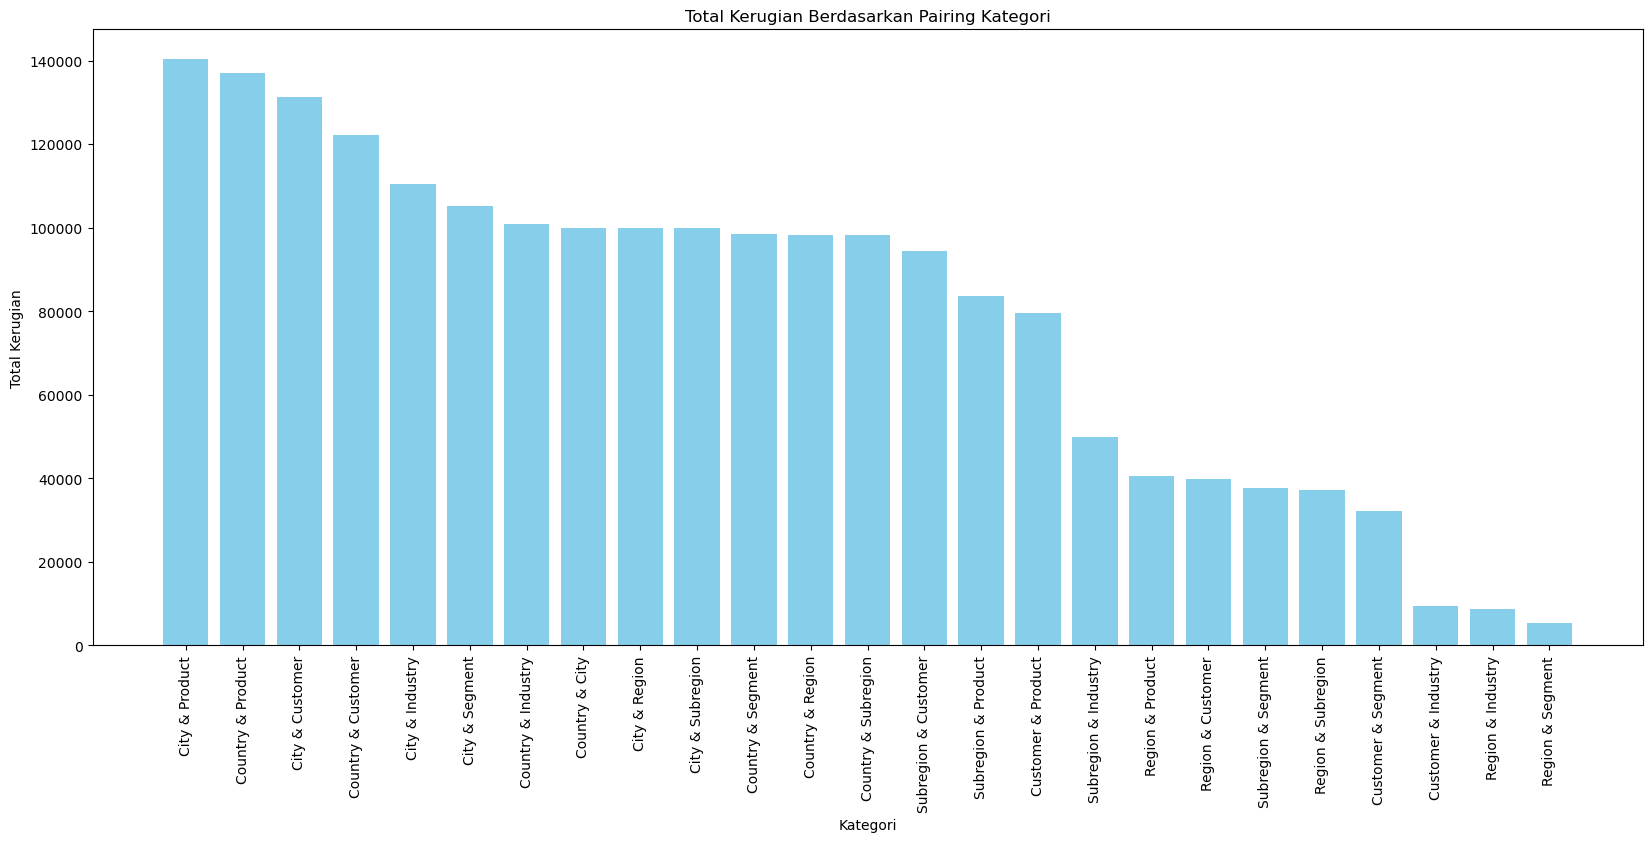

In [44]:
plt.figure(figsize=(20,8))
plt.bar(listTotalUnprofit.keys(), [abs(i) for i in listTotalUnprofit.values()], color='skyblue')
plt.xlabel('Kategori')
plt.ylabel('Total Kerugian')
plt.xticks(rotation = 90)
plt.title('Total Kerugian Berdasarkan Pairing Kategori')

# Menampilkan plot
plt.show()

Kita dapat melihat bahwa dengan gabungan atribut **City** dan **Product** menghasilkan infrensi nilai kerugian tertinggi hampir menyentuh ke angka **140,000**. Maka dari itu, kita akan langsung lanjut untuk menganalisi gabungan kedua atribut ini.

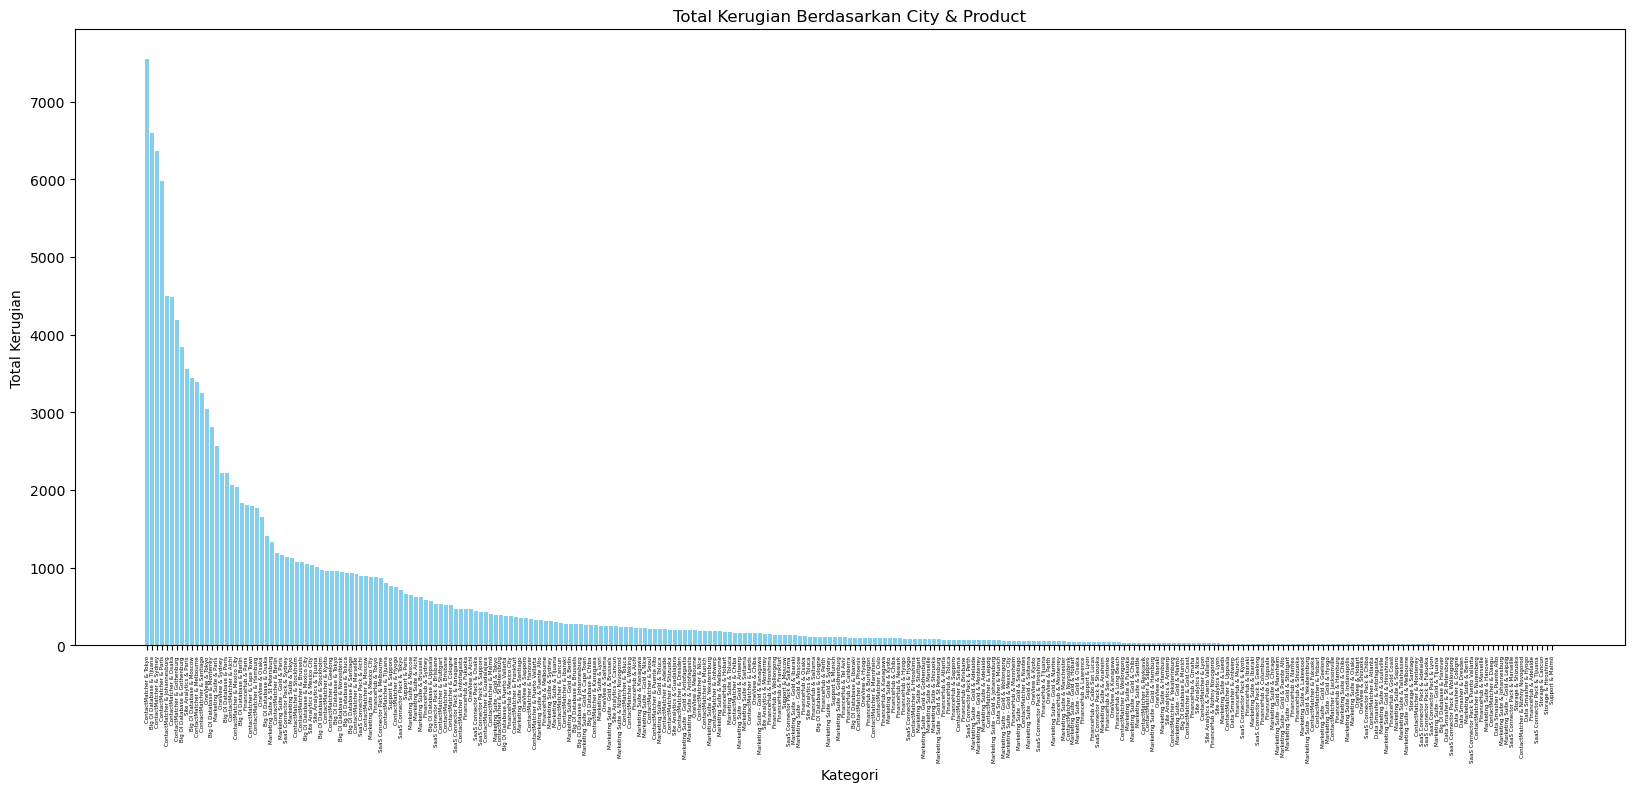

In [25]:
for i in  list(listTotalUnprofit.keys())[:1]:
    plt.figure(figsize=(20,8))
    plt.bar(listUnprofit[i].keys(), [abs(i) for i in listUnprofit[i].values()], color='skyblue')
    plt.xlabel('Kategori')
    plt.ylabel('Total Kerugian')
    plt.xticks(rotation = 90, fontsize = 4)
    plt.title(f'Total Kerugian Berdasarkan {i}')
    plt.show()

In [55]:
sum([abs(i) for i in listUnprofit[i].values()])/len([abs(i) for i in listUnprofit[i].values()])
max([abs(i) for i in listUnprofit[i].values()])
min([abs(i) for i in listUnprofit[i].values()])

1

Karena data yang ditamplikan sangat banyak sekali, kita hanya bisa melihat informasi secara globalnya saja. Untuk mendapatkan informasi secara lebih spesifik, lebih baik kita batasi menjadi 10 pasangan variabel yang menyebabkan transaksi kerugian terbesar.

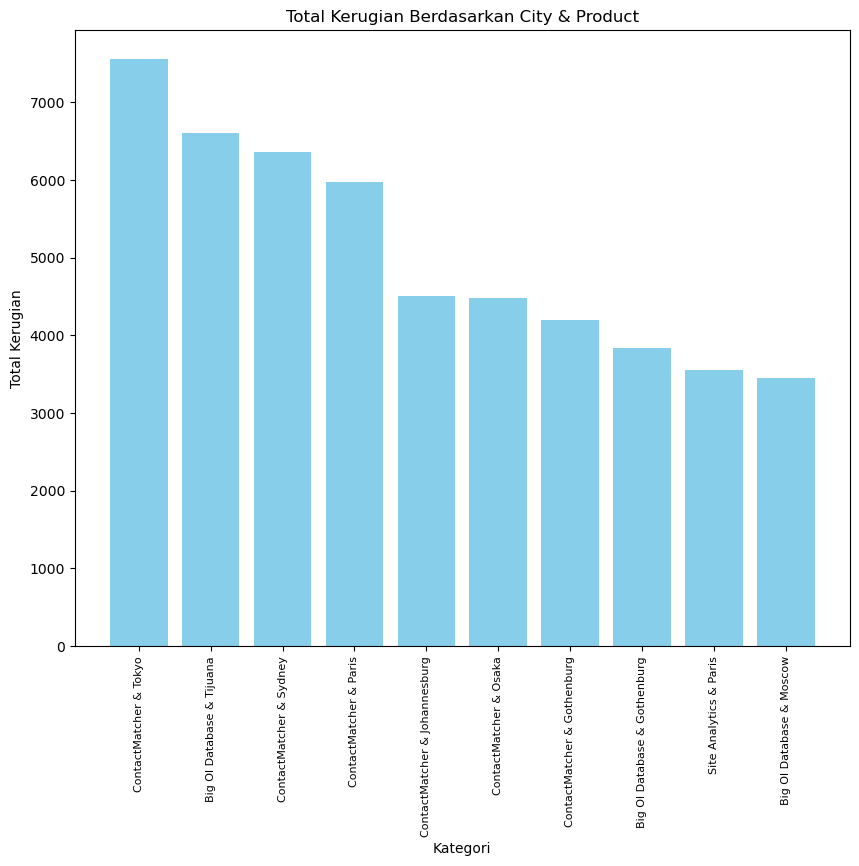

In [49]:
for i in  list(listTotalUnprofit.keys())[:1]:
    plt.figure(figsize=(10,8))
    plt.bar(list(listUnprofit[i].keys())[:10], [abs(i) for i in list(listUnprofit[i].values())[:10]], color='skyblue')
    plt.xlabel('Kategori')
    plt.ylabel('Total Kerugian')
    plt.xticks(rotation = 90, fontsize = 8)
    plt.title(f'Total Kerugian Berdasarkan {i}')
    plt.show()

Transaksi penjualan **ContactMatcher** di **Tokyo** memberikan kerugian yang besar terhadap perusahaan dan juga pasangan variabel seterusnya.

Kalau kita ingat kembali korelasi antar atribut diatas, kita bisa menyedari hal yang dapat menyebabkan besarnya profit kita turun salah satunya adalah besarnya diskon yang diberikan di setiap transaksi. Baik kita cek terlebih dahulu untuk besarnya pemberian diskon di masing-masing transaksi produk dan spesifik kotanya yang mengalami kerugian.

In [27]:
listDiscount = {}
crossTabData = pd.crosstab(values= df["Discount"], index = df["Product"], columns= df["City"], aggfunc = "mean")[listObjMap["City & Product"]].fillna(0)
display(crossTabData)
for x,y in crossTabData.items():
    for z in y[y>0]:
        y1 = y[y==z].index[-1]
        listDiscount[str(x) + " & " + str(y1)] = round(z,3)*100
listDiscount = dict(sorted(listDiscount.items(), key=lambda item: item[1], reverse = True))

City,Abu Dhabi,Adelaide,Aichi,Alexandria,Alicante,Amsterdam,Anaheim,Ankara,Antofagasta,Antwerp,...,Warsaw,Wellington,Wilmington,Winnipeg,Woking,Wollongong,Yekaterinburg,Yonkers,Zagreb,Zaragoza
Product,,,,,,,,,,,,,,,,,,,,,
Alchemy,0.0,0.00,0.000,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0
Big Ol Database,0.0,0.00,0.000,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0
ChatBot Plugin,0.0,0.00,0.000,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0
ContactMatcher,0.0,0.74,0.675,0.0,0.0,0.0,0.00,0.0,0.642857,0.666667,...,0.0,0.0,0.0,0.0,0.25,0.800,0.7,0.0,0.0,0.0
Data Smasher,0.0,0.00,0.000,0.0,0.0,0.0,0.00,0.0,0.200000,0.200000,...,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0
FinanceHub,0.0,0.30,0.240,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00,0.225,0.0,0.0,0.0,0.0
Marketing Suite,0.0,0.30,0.320,0.0,0.0,0.0,0.15,0.0,0.700000,0.000000,...,0.0,0.0,0.0,0.0,0.00,0.000,0.7,0.0,0.0,0.0
Marketing Suite - Gold,0.0,0.20,0.000,0.0,0.0,0.0,0.00,0.0,0.200000,0.200000,...,0.0,0.0,0.0,0.0,0.00,0.200,0.2,0.0,0.0,0.0
OneView,0.0,0.00,0.800,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0


Kita akan mentransformasikan menjadi sebuah visualisasi agar lebih mudah dianalisis.

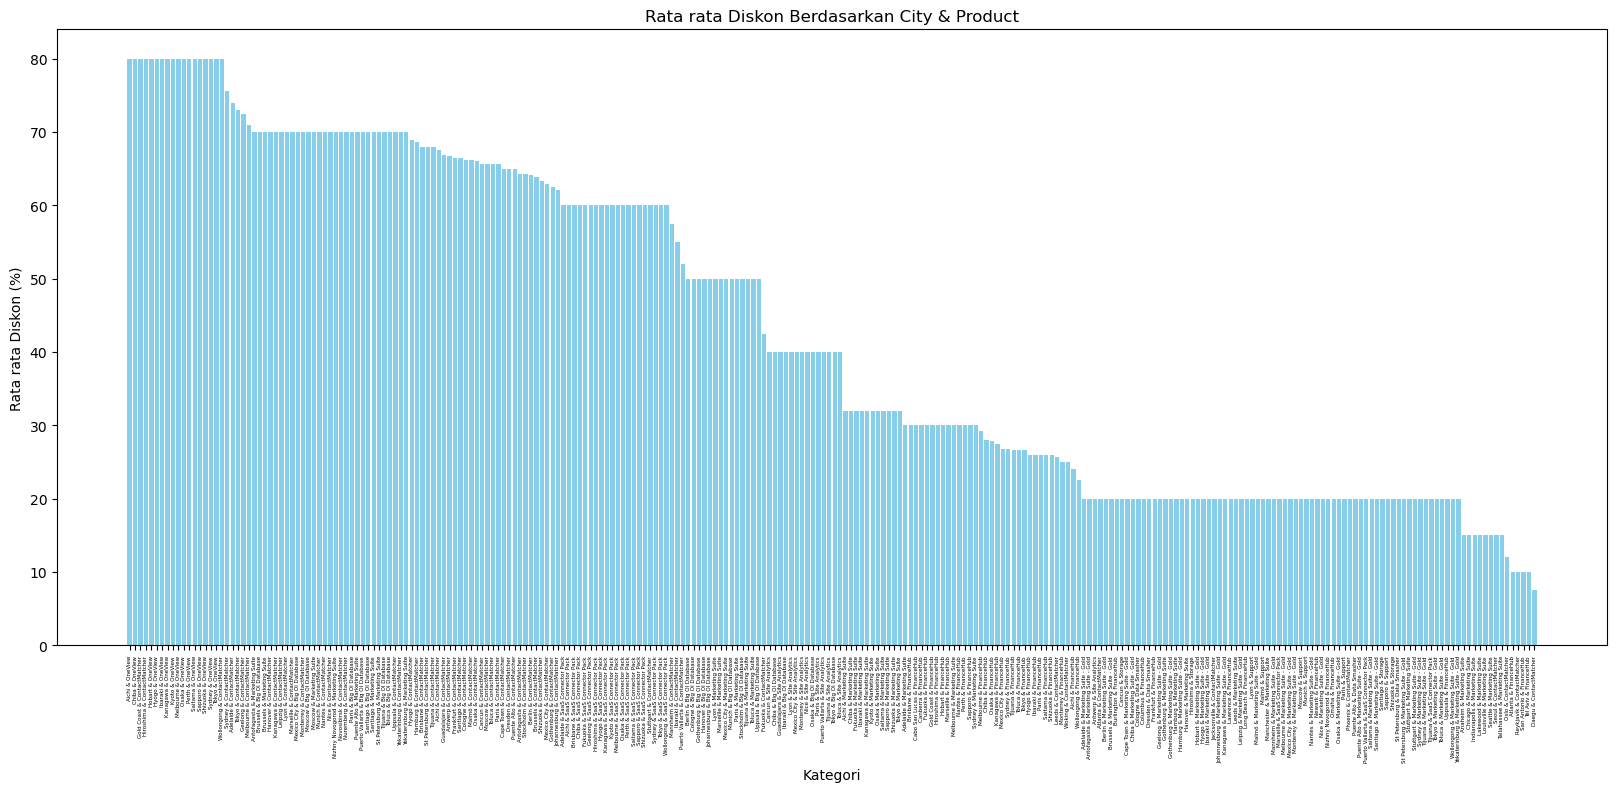

In [28]:
plt.figure(figsize=(20,8))
plt.bar(listDiscount.keys(), [abs(i) for i in listDiscount.values()], color='skyblue')
plt.xlabel('Kategori')
plt.ylabel('Rata rata Diskon (%)')
plt.xticks(rotation = 90, fontsize = 4)
plt.title(f'Rata rata Diskon Berdasarkan City & Product')
plt.show()

Kita akan memperkecil variabel visualisasinya agar kita bisa mengetahui pada transaksi produk mana yang terjadi di kota mana yang memberikan diskon terbesar yang menyebabkan profit menurun atau bahkan merugi.

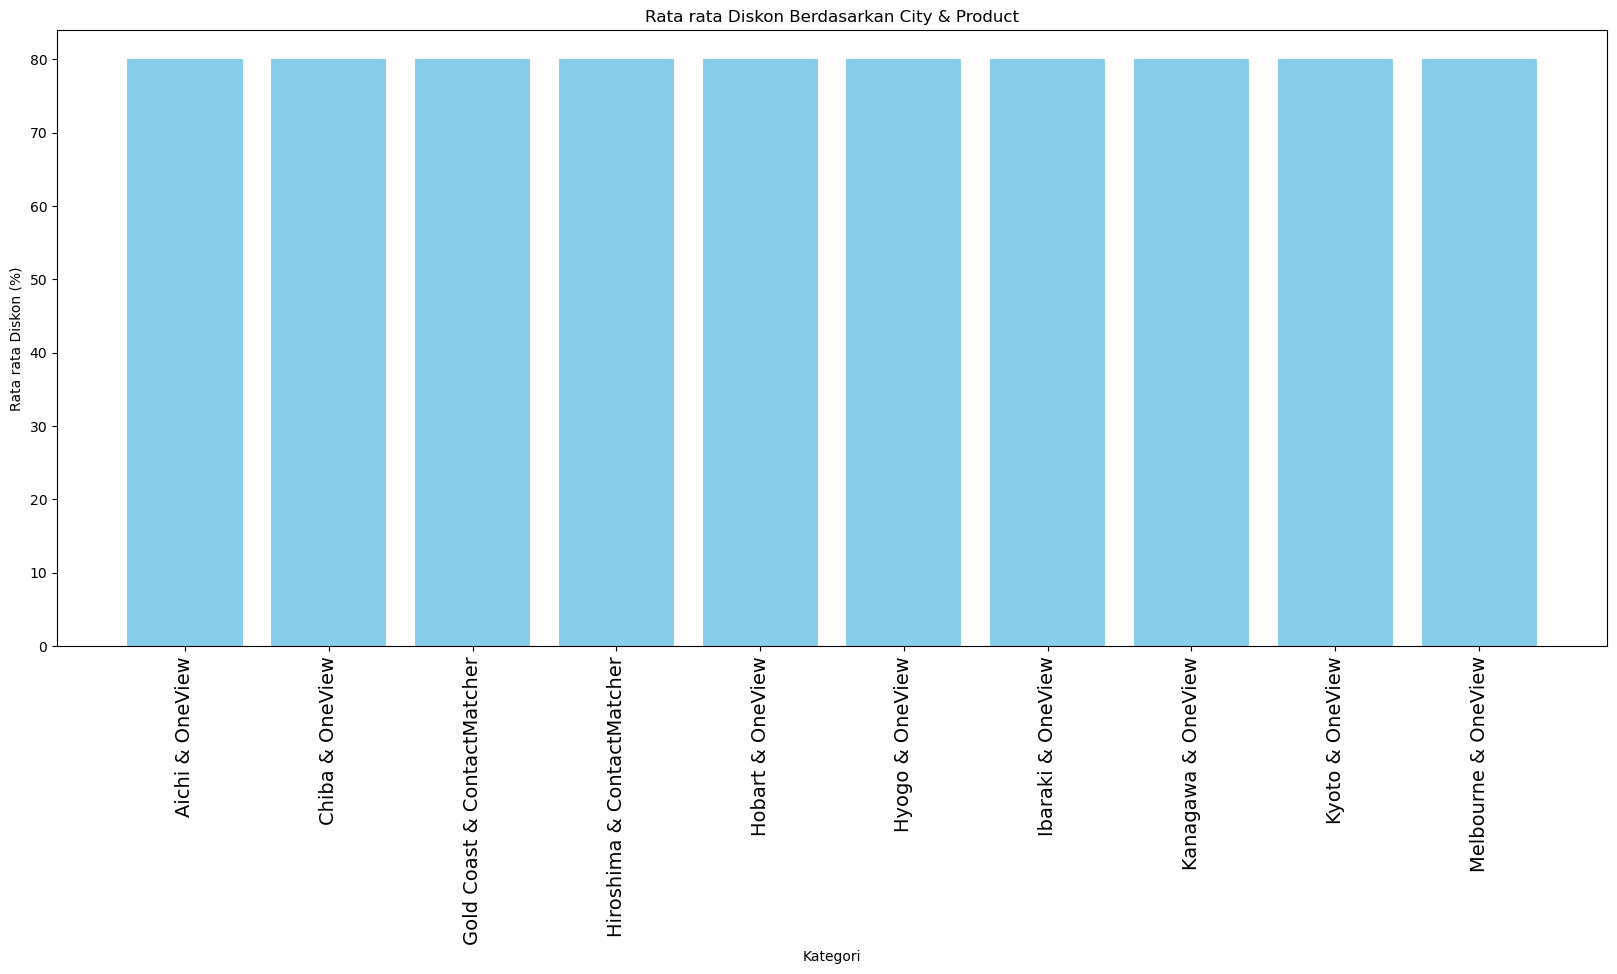

In [47]:
plt.figure(figsize=(20,8))
plt.bar(list(listDiscount.keys())[:10], [abs(i) for i in list(listDiscount.values())[:10]], color='skyblue')
plt.xlabel('Kategori')
plt.ylabel('Rata rata Diskon (%)')
plt.xticks(rotation = 90, fontsize = 14)
plt.title(f'Rata rata Diskon Berdasarkan City & Product')
plt.show()

Kita bisa mengamati bar plot pada 10 kota ini. Perusahaan menerapkan diskon sebesar **80%** kepada transaksi produk spesifik di kota spesifik. Langkah selanjutnya, kita mau mencari berapa persentase transaksi spesifik pada suatu kota.

In [35]:
print("Persentase antara kota yang mengalami kerugian yang disebabkan oleh diskon")
print((pd.crosstab(values= df["Profit"], index = df["Product"], columns= df["City"], aggfunc = "sum").fillna(0) < 0 ).count().sum()/(crossTabData > 0).count().sum())


Persentase antara kota yang mengalami kerugian yang disebabkan oleh diskon
1.0


Dapat kita lihat bahwa **100%** atau semua transaksi sebuah produk pada sautu kota yang merugi, mereka semua menerapkan **diskon** (baik yang besar maupun yang kecil). Terakhir, kita ingin mengetahui rata-rata diskon pada transaksi produk di kota tertentu.

In [31]:
rataRataDiskon = crossTabData.replace(0,np.nan).mean().mean()
print(f"Rata-rata dikson yang diberikan {100*rataRataDiskon:.2f}%")

Rata-rata dikson yang diberikan 37.43%


<span style="font-size:24px;">**Kesimpulan**</span>
1. Dengan analisi yang kita lakukan, kita bisa tahu bahwa setiap transaksi produk yang merugikan  pada kota tertentu semuanya menerapkan diskon (baik besar maupun kecil). Rata rata diskon yang diterapkan ke setiap transaksi produk pada kota tertentu yang merugi adalah sebesar **37.43%**.
2. Menaikan diskon ternyata justru berdampak kecil pada penurunan sales dan berdampak besar kepada pengurangan profit,  bahkan hingga merugi secara signifikan.
3. Menerapak diskon **30%** atau diatasnya untuk setiap transaksi produk  akan cenderung menyebabkan kerugian.

<span style="font-size:24px;">**Rekomendasi**</span>
1. Hindari memberi diskon besar, karena hal ini tidak membantu menumbuhkan **Sales** bahkan **Profit**. Jika ingin memberikan **Discount**, berikanlah diantara **0-10%**, Hal ini berpotensi meningkatkan **Sales** tapi tidak menutup kemungkinan untuk mendatangkan kerugian seperti pada point ke-**2**.
2. Hilangkan diskon untuk setiap pasangan produk dan kota dibawah ini, karena hanya menimbulkan kerugian: 

In [32]:
for i in sorted(list(listUnprofit['City & Product'].keys())):
    print(f"Produk {i.split('&')[0]} pada kota {i.split('&')[1]}")

Produk Big Ol Database  pada kota  Berlin
Produk Big Ol Database  pada kota  Brussels
Produk Big Ol Database  pada kota  Chiba
Produk Big Ol Database  pada kota  Cologne
Produk Big Ol Database  pada kota  Gothenburg
Produk Big Ol Database  pada kota  Hanover
Produk Big Ol Database  pada kota  Ibaraki
Produk Big Ol Database  pada kota  Johannesburg
Produk Big Ol Database  pada kota  Mexico City
Produk Big Ol Database  pada kota  Monterrey
Produk Big Ol Database  pada kota  Moscow
Produk Big Ol Database  pada kota  Munich
Produk Big Ol Database  pada kota  Novosibirsk
Produk Big Ol Database  pada kota  Osaka
Produk Big Ol Database  pada kota  Paris
Produk Big Ol Database  pada kota  Puerto Vallarta
Produk Big Ol Database  pada kota  Santiago
Produk Big Ol Database  pada kota  Stockholm
Produk Big Ol Database  pada kota  Tijuana
Produk Big Ol Database  pada kota  Tokyo
Produk Big Ol Database  pada kota  Toluca
Produk Big Ol Database  pada kota  Uppsala
Produk ContactMatcher  pada kota  Ad

3. Dengan menghilangkan diskon pada transaksi produk di suatu kota tertentu yang mengalami kerugian. Kita bisa meningkatkan salesnya seperti perkiraan di bawah ini

In [33]:

print("Kenaikan Sales tanpa diskon pada transaksi produk di suatu kota yang merugi:")
print(f"{100*(1/(1-rataRataDiskon)-1):.2f}%")
print("Proporsi sales yang merugi di dalam sales global:")
crossTabDataCondition = pd.crosstab(values= df["Profit"], index = df["Product"], columns= df["City"], aggfunc = "sum").fillna(0)
crossTabDataSales = pd.crosstab(values= df["Sales"], index = df["Product"], columns= df["City"], aggfunc = "sum")[crossTabDataCondition<0].fillna(0)
print(f"{100*crossTabDataSales.sum().sum()/df['Sales'].sum():.2f}%")
print("Kenaikan sales tanpa diskon untuk transaksi yang merugi dalam skala global:")
kenaikanSalesG = (1/(1-0.37))* (crossTabDataSales.sum().sum()/df["Sales"].sum())
print(f"{kenaikanSalesG*100:.2f}%")
print("Kenaikan sales jika menghilangkan diskon pada transaksi produk di suatu kota yang merugi:")
print(f"{(kenaikanSalesG+1)*df['Sales'].sum().sum():.0f} dari semula {df['Sales'].sum().sum():.0f}. Hal ini dapat menaikan sales sebanyak {(kenaikanSalesG+1)*df['Sales'].sum().sum()-df['Sales'].sum().sum():.0f} atau {100*((kenaikanSalesG+1)*df['Sales'].sum().sum()-df['Sales'].sum().sum())/df['Sales'].sum().sum():.2f}%")

Kenaikan Sales tanpa diskon pada transaksi produk di suatu kota yang merugi:
59.81%
Proporsi sales yang merugi di dalam sales global:
18.48%
Kenaikan sales tanpa diskon untuk transaksi yang merugi dalam skala global:
29.33%
Kenaikan sales jika menghilangkan diskon pada transaksi produk di suatu kota yang merugi:
2971041 dari semula 2297201. Hal ini dapat menaikan sales sebanyak 673840 atau 29.33%


Bisa kita lihat dari analisis diatas bahwa dengan menghilangkan diskon pada transaksi produk di suatu kota yang merugi, kita dapat meningkatkan sales hingga **673840** atau sekitar **29.33%**.

4. Dengan menghilangkan diskon pada transaksi produk di suatu kota yang merugi kita bisa meningkatkan **Sales** secara global yang tentunya akan meningkatkan profit

In [34]:
print("Profit dari produk yang transaksinya tidak mengalami kerugian:")
profitBarang = df[df["Discount"] == 0]["Profit"].sum().sum()/df[df["Discount"] == 0]["Sales"].sum().sum()
print(f"{100*profitBarang:.3f}%")
print("Uang yang bisa dihemat kalau tidak menerapkan diskon kepada transaksi produk di suatu kota yang mengalami kerugian:")
uangDihemat = abs(list(listTotalUnprofit.values())[0])
print(uangDihemat)
print("Profit yang bisa didapat jika kita tidak menerapkan diskon di transaksi produk pada kota yang mengalami kerugian:")
salesNaik = (kenaikanSalesG+1)*df['Sales'].sum().sum()-df['Sales'].sum().sum()
print(f"{salesNaik*profitBarang+uangDihemat:.0f} atau {100*(salesNaik*profitBarang+uangDihemat)/ df['Profit'].sum().sum():.2f}%")

Profit dari produk yang transaksinya tidak mengalami kerugian:
29.505%
Uang yang bisa dihemat kalau tidak menerapkan diskon kepada transaksi produk di suatu kota yang mengalami kerugian:
140423
Profit yang bisa didapat jika kita tidak menerapkan diskon di transaksi produk pada kota yang mengalami kerugian:
339240 atau 118.45%


Dari hasil analisi dan kesimpulan, kita bisa tahu bahwa dengan menghilangkan **Discount** pada transaksi produk di kota-kota yang mengalami kerugian, maka kita akan mampu menaikan profit hingga **339240** atau sekitar **118.45%**.